# Forecasting energy availability from renewable sources

### Data Exploration by [Saurav Thakur](st23588@essex.ac.uk) for coursework project of Data Science and Decision Making (CE888)

- [Weather Documentation Link](https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/)


# Introduction

The [problem statement](../2023_24_CE888_Project_Energy.pdf) is to build a model which can predict solar or wind energy atleast 24 hours in advance such that if there will be sulprus amount of energy, the company can send out an alert to customer in the particular area so that the customers can opt in a slot. Here the company is actually worried about the false positives, which means if there is no sulpurs amount of energy and if the company provides free electricity to the customers then the company will have to bear a huge cost. 

So the main aim of this project is to predict the solar energy atleast 24 hours in advance keeping in mind about the false positives.

In this project we will follow an end to end life cycle of a data science project. Data science life cycle consists of:

1. Understanding the problem.
2. Gathering the relevant data.
3. Data Preparation
4. Exploratory Data Analysis (EDA)
4. Feature Engineering and Feature Extraction
5. Model Building

In this project we will follow all of these steps. 

## Table of Contents

 1. [Introduction](#introduction)
 2. [Importing Libraries](#importing-libraries)
 3. [Data Preparation](#data-preparation)
    - [Exploring Data](#exploring-data)
    - [Combining Dataset](#combining-dataset)
    - [Data Splitting](#data-splitting)


 4. [Exploratory Data Analysis](#exploratory-data-analysis)
 5. [Feature Engineering and Selection](#feature-engineering-and-selection)

# Importing Libraries
[ go to top ](#Table-of-contents)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

plt.style.use('seaborn-v0_8-whitegrid')
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

[ go to top ](#Table-of-contents)

First of all let's explore data randomly. Since we have around 195 dataset we don't know how every data looks like. So first we will randomly pick up some csv files and we will try to see how the data looks like.

## Exploring Data

In [2]:
# this function takes a file name and prints its shape and prints the dataset head sample or tail
def read_dataset(file_name: str,number_of_rows: int=10,tail: bool=False) ->pd.DataFrame:

    # reading the dataset
    df = pd.read_csv(f"../dataset/weatherdata/{file_name}.csv")
    print(f"The shape of this data is {df.shape}")

    # returning tail data if tail is True else we will return head
    if tail:
        return df.tail(10)
    return df.head(10)

The function written above takes a filename and shows the head or tail data whichever parameter you pass. Now let us see how our dataset looks like.

In [3]:
read_dataset("colchester_001")

The shape of this data is (960, 15)


datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2000-01-01T00:00:00   5.9  5.7     98.63   0.000         0.0        NaN   
1  2000-01-01T01:00:00   6.4  5.8     96.12   0.000         0.0        NaN   
2  2000-01-01T02:00:00   6.6  6.4     98.31   0.000         0.0        NaN   
3  2000-01-01T03:00:00   7.2  6.5     95.92   0.000         0.0        NaN   
4  2000-01-01T04:00:00   7.2  6.6     96.38   0.000         0.0        NaN   
5  2000-01-01T05:00:00   7.5  6.8     95.85   0.000         0.0        NaN   
6  2000-01-01T06:00:00   8.0  7.3     95.37   0.044       100.0       rain   
7  2000-01-01T07:00:00   8.0  7.3     95.22   0.000         0.0        NaN   
8  2000-01-01T08:00:00   7.6  7.2     97.35   0.000         0.0        NaN   
9  2000-01-01T09:00:00   7.5  6.8     95.50   0.000         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   NaN        NaN        9.4    210.0            1020.6         NaN   
1   NaN        NaN       15.1    233.0            1020.4       100.0   
2   NaN        NaN       13.9    238.0            1020.5       100.0   
3   NaN        NaN       14.1    232.0            1020.5       100.0   
4   NaN        NaN       14.3    242.0            1020.4       100.0   
5   NaN        NaN       14.1    270.0            1021.3       100.0   
6   NaN        NaN       11.9    290.0            1021.7       100.0   
7   NaN        NaN       10.6    300.0            1022.6       100.0   
8   NaN        NaN       12.3    308.0            1023.5        90.0   
9   NaN        NaN       13.3    326.0            1024.4        90.0   

   solarradiation  uvindex  
0             NaN      NaN  
1             NaN      NaN  
2             NaN      NaN  
3             NaN      NaN  
4             NaN      NaN  
5             NaN      NaN  
6             NaN      NaN  
7             NaN      NaN  
8             NaN      NaN  
9             NaN      NaN

In [4]:
read_dataset("colchester_002")

The shape of this data is (960, 16)


datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2000-02-10T00:00:00   6.3  2.9     78.34     0.0         0.0        NaN   
1  2000-02-10T01:00:00   6.0  3.1     81.78     0.0         0.0        NaN   
2  2000-02-10T02:00:00   6.9  2.9     75.45     0.0         0.0        NaN   
3  2000-02-10T03:00:00   7.2  2.8     73.52     0.0         0.0        NaN   
4  2000-02-10T04:00:00   7.4  3.7     77.27     0.0         0.0        NaN   
5  2000-02-10T05:00:00   7.7  3.6     75.31     0.0         0.0        NaN   
6  2000-02-10T06:00:00   8.1  3.8     74.43     0.0         0.0        NaN   
7  2000-02-10T07:00:00   8.3  4.2     75.19     0.0         0.0        NaN   
8  2000-02-10T08:00:00   8.0  4.5     78.43     0.0         0.0        NaN   
9  2000-02-10T09:00:00   7.5  6.1     90.73     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       24.8    199.0            1019.4        90.0   
1   0.0        0.0       27.2    198.0            1018.0        90.0   
2   0.0        0.0       28.4    205.0            1017.0        76.4   
3   0.0        0.0       33.6    201.0            1015.1        90.0   
4   0.0        0.0       36.7    205.0            1013.6        87.9   
5   0.0        0.0       37.8    208.0            1011.8        90.0   
6   0.0        0.0       41.5    204.0            1010.7        90.0   
7   0.0        0.0       45.7    204.0            1009.1        95.4   
8   0.0        0.0       41.6    203.0            1008.7        98.1   
9   0.0        0.0       37.0    201.0            1007.6        98.1   

   solarradiation  solarenergy  uvindex  
0             NaN          NaN      NaN  
1             NaN          NaN      NaN  
2             NaN          NaN      NaN  
3             NaN          NaN      NaN  
4             NaN          NaN      NaN  
5             NaN          NaN      NaN  
6             NaN          NaN      NaN  
7             NaN          NaN      NaN  
8             NaN          NaN      NaN  
9             NaN          NaN      NaN

In [5]:
read_dataset("colchester_002")

The shape of this data is (960, 16)


datetime  temp  dew  humidity  precip  precipprob preciptype  \
0  2000-02-10T00:00:00   6.3  2.9     78.34     0.0         0.0        NaN   
1  2000-02-10T01:00:00   6.0  3.1     81.78     0.0         0.0        NaN   
2  2000-02-10T02:00:00   6.9  2.9     75.45     0.0         0.0        NaN   
3  2000-02-10T03:00:00   7.2  2.8     73.52     0.0         0.0        NaN   
4  2000-02-10T04:00:00   7.4  3.7     77.27     0.0         0.0        NaN   
5  2000-02-10T05:00:00   7.7  3.6     75.31     0.0         0.0        NaN   
6  2000-02-10T06:00:00   8.1  3.8     74.43     0.0         0.0        NaN   
7  2000-02-10T07:00:00   8.3  4.2     75.19     0.0         0.0        NaN   
8  2000-02-10T08:00:00   8.0  4.5     78.43     0.0         0.0        NaN   
9  2000-02-10T09:00:00   7.5  6.1     90.73     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       24.8    199.0            1019.4        90.0   
1   0.0        0.0       27.2    198.0            1018.0        90.0   
2   0.0        0.0       28.4    205.0            1017.0        76.4   
3   0.0        0.0       33.6    201.0            1015.1        90.0   
4   0.0        0.0       36.7    205.0            1013.6        87.9   
5   0.0        0.0       37.8    208.0            1011.8        90.0   
6   0.0        0.0       41.5    204.0            1010.7        90.0   
7   0.0        0.0       45.7    204.0            1009.1        95.4   
8   0.0        0.0       41.6    203.0            1008.7        98.1   
9   0.0        0.0       37.0    201.0            1007.6        98.1   

   solarradiation  solarenergy  uvindex  
0             NaN          NaN      NaN  
1             NaN          NaN      NaN  
2             NaN          NaN      NaN  
3             NaN          NaN      NaN  
4             NaN          NaN      NaN  
5             NaN          NaN      NaN  
6             NaN          NaN      NaN  
7             NaN          NaN      NaN  
8             NaN          NaN      NaN  
9             NaN          NaN      NaN

In [6]:
read_dataset(file_name="colchester_010")

The shape of this data is (961, 16)


0     1     2         3       4           5           6  \
0             datetime  temp   dew  humidity  precip  precipprob  preciptype   
1  2000-12-27T00:00:00   1.3  -1.5     81.73     0.0         0.0         NaN   
2  2000-12-27T01:00:00   1.2  -1.0      85.1     0.0         0.0         NaN   
3  2000-12-27T02:00:00   1.2  -1.1      84.8     0.0         0.0         NaN   
4  2000-12-27T03:00:00   1.2  -1.0     85.51     0.0         0.0         NaN   
5  2000-12-27T04:00:00   1.2  -1.5     82.21     0.0         0.0         NaN   
6  2000-12-27T05:00:00   1.2  -1.3     83.63     0.0         0.0         NaN   
7  2000-12-27T06:00:00   1.3  -1.7     80.65     0.0         0.0         NaN   
8  2000-12-27T07:00:00   1.2  -1.7     81.03     0.0         0.0         NaN   
9  2000-12-27T08:00:00   1.3  -1.6     81.04     0.0         0.0         NaN   

      7          8          9       10                11          12  \
0  snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   
1   0.0        0.0       16.9     36.0             991.9       100.0   
2   0.0        0.0       16.7     24.0             991.2       100.0   
3   0.0        0.0       18.3     20.0             991.0       100.0   
4   0.0        0.0       18.5     14.0             990.9       100.0   
5   0.0        0.0       19.5     10.0             990.4       100.0   
6   0.0        0.0       17.7     10.0             990.8       100.0   
7   0.0        0.0       18.5     10.0             991.0       100.0   
8   0.0        0.0       19.1     10.0             991.1       100.0   
9   0.0        0.0       18.7     10.0             991.3       100.0   

               13           14       15  
0  solarradiation  solarenergy  uvindex  
1             NaN          NaN      NaN  
2             NaN          NaN      NaN  
3             NaN          NaN      NaN  
4             NaN          NaN      NaN  
5             NaN          NaN      NaN  
6             NaN          NaN      NaN  
7             NaN          NaN      NaN  
8             NaN          NaN      NaN  
9             NaN          NaN      NaN

In [7]:
read_dataset(file_name="colchester_010",tail=True)

The shape of this data is (961, 16)


0    1    2      3      4      5     6    7    8     9  \
951  2001-02-04T14:00:00  8.5  8.0  97.01    0.0    0.0   NaN  0.0  0.0  18.6   
952  2001-02-04T15:00:00  9.2  8.3  94.11    0.0    0.0   NaN  0.0  0.0  23.4   
953  2001-02-04T16:00:00  8.7  7.5  92.23    0.0    0.0   NaN  0.0  0.0  14.5   
954  2001-02-04T17:00:00  8.5  7.4  92.62    0.0    0.0   NaN  0.0  0.0  15.5   
955  2001-02-04T18:00:00  8.3  7.0  91.22  4.201  100.0  rain  0.0  0.0  17.7   
956  2001-02-04T19:00:00  8.1  7.2  93.95    0.0    0.0   NaN  0.0  0.0  18.3   
957  2001-02-04T20:00:00  8.1  6.9  92.32    0.0    0.0   NaN  0.0  0.0  21.2   
958  2001-02-04T21:00:00  7.9  6.9  93.02    0.0    0.0   NaN  0.0  0.0  26.1   
959  2001-02-04T22:00:00  7.8  6.8  93.58    0.0    0.0   NaN  0.0  0.0  21.3   
960  2001-02-04T23:00:00  7.6  6.4   91.6    0.0    0.0   NaN  0.0  0.0  20.3   

        10     11     12   13   14   15  
951  196.0  994.3  100.0  NaN  NaN  NaN  
952  223.0  993.7  100.0  NaN  NaN  NaN  
953  208.0  993.4  100.0  NaN  NaN  NaN  
954  192.0  992.6   90.0  NaN  NaN  NaN  
955  181.0  991.8   90.0  NaN  NaN  NaN  
956  174.0  990.6   90.0  NaN  NaN  NaN  
957  182.0  989.4   90.0  NaN  NaN  NaN  
958  190.0  988.2   90.0  NaN  NaN  NaN  
959  189.0  987.0   90.0  NaN  NaN  NaN  
960  195.0  985.9   90.0  NaN  NaN  NaN

In [8]:
read_dataset(file_name="colchester_090")

The shape of this data is (961, 16)


0     1    2         3       4           5           6  \
0             datetime  temp  dew  humidity  precip  precipprob  preciptype   
1  2010-05-29T00:00:00  12.4  7.1     70.13     0.0         0.0         NaN   
2  2010-05-29T01:00:00  11.7  7.9     77.68     0.0         0.0         NaN   
3  2010-05-29T02:00:00  10.1  7.9     86.64     0.0         0.0         NaN   
4  2010-05-29T03:00:00   9.7  7.9     88.63     0.0         0.0         NaN   
5  2010-05-29T04:00:00  10.0  8.4     89.54     0.0         0.0         NaN   
6  2010-05-29T05:00:00  10.0  8.3     89.11     0.0         0.0         NaN   
7  2010-05-29T06:00:00  10.1  8.6      90.4     0.0         0.0         NaN   
8  2010-05-29T07:00:00  10.4  9.0      91.1     0.0         0.0         NaN   
9  2010-05-29T08:00:00  11.3  9.1     86.36     0.0         0.0         NaN   

      7          8          9       10                11          12  \
0  snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   
1   0.0          0       12.6    223.0            1015.6        88.9   
2   0.0          0       10.5    233.0            1015.5        45.5   
3   0.0          0        9.5    231.0            1015.4        53.7   
4   0.0          0        9.8    222.0            1015.2        70.0   
5   0.0          0        9.7    209.0            1015.2        70.1   
6   0.0          0        7.8    198.0            1015.0        68.2   
7   0.0          0       10.1    183.0            1014.9        84.8   
8   0.0          0        NaN    174.0            1014.3        93.9   
9   0.0          0       10.5    175.0            1014.1        91.8   

               13           14       15  
0  solarradiation  solarenergy  uvindex  
1             NaN          NaN      NaN  
2             NaN          NaN      NaN  
3             NaN          NaN      NaN  
4             NaN          NaN      NaN  
5             NaN          NaN      NaN  
6             NaN          NaN      NaN  
7             NaN          NaN      NaN  
8             NaN          NaN      NaN  
9             NaN          NaN      NaN

In [9]:
read_dataset(file_name="colchester_100")

The shape of this data is (961, 16)


0     1     2         3       4           5           6  \
0             datetime  temp   dew  humidity  precip  precipprob  preciptype   
1  2011-08-12T00:00:00  17.1  14.8     86.53     0.0         0.0         NaN   
2  2011-08-12T01:00:00  16.1  14.7     91.84     0.0         0.0         NaN   
3  2011-08-12T02:00:00  16.1  15.0     93.23     0.0         0.0         NaN   
4  2011-08-12T03:00:00  15.6  14.5     93.38     0.0         0.0         NaN   
5  2011-08-12T04:00:00  15.6  14.6     93.38     0.0         0.0         NaN   
6  2011-08-12T05:00:00  15.2  14.6     96.23     0.0         0.0         NaN   
7  2011-08-12T06:00:00  15.4  14.5     94.34     0.0         0.0         NaN   
8  2011-08-12T07:00:00  15.5  14.5     94.12     0.0         0.0         NaN   
9  2011-08-12T08:00:00  16.9  15.1     89.14     0.0         0.0         NaN   

      7          8          9       10                11          12  \
0  snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover   
1   0.0        0.0       11.8    260.0            1009.1        87.3   
2   0.0        0.0       10.5    254.0            1009.2        29.9   
3   0.0        0.0       12.4    254.0            1009.1        63.3   
4   0.0        0.0       11.8    250.0            1009.1        87.8   
5   0.0        0.0       11.4    252.0            1009.2        55.5   
6   0.0        0.0       10.4    260.0            1009.2        81.0   
7   0.0        0.0       10.2    267.0            1009.4        58.0   
8   0.0        0.0        9.6    278.0            1009.5        64.7   
9   0.0        0.0       11.3    296.0            1010.1        94.8   

               13           14       15  
0  solarradiation  solarenergy  uvindex  
1             0.0          0.0      0.0  
2             0.0          0.0      0.0  
3             0.0          0.0      0.0  
4             0.0          0.0      0.0  
5             0.0          0.0      0.0  
6             2.9          0.0      0.0  
7            67.0          0.2      1.0  
8           167.1          0.6      2.0  
9           256.9          0.9      3.0

We can see that some of the dataset files has column names on their first row. So while combining all those datasets we have to be very careful.

## Combining Dataset

We have seen multuple datasets and now we will combine them all to make a single dataframe.

In [10]:
# function to combine all datasets.
def combining_datasets(weather_data_folderpath):

    i = 1
    flag = False

    
    """
    loops till 196 since we have 196 files for colchester
    It will cover all files for colchester. 
    And whenever the file is not found it breaks out of the loop since all of the files has been combined. 
    """
    

    while True:

        try:

            '''
            we will handle all cases diiferently. First till 10th and then 100 and then 200.

            '''
            if i < 10:
                df = pd.read_csv(f"{weather_data_folderpath}/colchester_00{i}.csv")
        
            elif i >= 10 and i < 100:
                df = pd.read_csv(f"{weather_data_folderpath}/colchester_0{i}.csv")

            elif i > 100:
                df = pd.read_csv(f"{weather_data_folderpath}/colchester_{i}.csv")

            '''
            Some of the datasets as seen above has no columns and 
            they are named as 0 to 15 and the first row is the column 
            name. So the first row is replaced as column name.

            '''
            if "1" in df.columns:
                col_head = df.iloc[0]
                df = df[1:]
                df.columns = col_head

            # Handling the case where the number of columns are not exactly 16.
            if df.shape[1] != 16:
                print(i)

            else:
                # making merged_df as df for the first iteration to remove the duplicates.
                if flag == False:
                    merged_df = df
                    flag = True
                else:
                    merged_df = pd.concat([merged_df,df],axis=0)

        except Exception as e:
            break

        i+= 1

    return merged_df

In [11]:
def file_exists_in_drive(file_path):
    return os.path.exists(file_path)

**Provide the weather dataset folder path which consists of all data for each year**

In [12]:
# provide the path where each csv file exists.
weather_data_folderpath = "../dataset/weatherdata"

# provide the folder where you want to save the combined csv file.
combined_dataset_filepath = "../dataset/colchester_weather_dataset.csv"
combined_filedir,filename = os.path.split(combined_dataset_filepath)

# making the dataset folder if doesnot exists 
os.makedirs(combined_filedir,exist_ok=True)

if not file_exists_in_drive(file_path=combined_dataset_filepath):
    df = combining_datasets(weather_data_folderpath)
    df.to_csv(combined_dataset_filepath,index=False)
    print(f"combined file saved at: {combined_dataset_filepath}")
else:
    print("Combined file exists!!")

Combined file exists!!


Now all the datasets are combined and is ready to be explored.

In [86]:
# reading the combined dataset.
df = pd.read_csv("../dataset/colchester_weather_dataset.csv")

In [14]:
df.shape

(186081, 16)

In [87]:
# converting datetime column to datetime
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year

In [88]:
# lets check if we have duplicate data. We will remove those.
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

0


(186081, 17)

We have 186081 number of rows in the data. And since we have hourly data so that means the total hours of data we have in the whole dataset is 186081.

## Data Splitting 

Now we will split the data into training and testing data to avoid the data leakage. Since this is time series data we have to very careful while splitting the data. We will use data from 2000 to 2018 for exploration and training and 2019, 2020 for validation and 2021 to January 2024 for testing.

In [17]:
train_data = df.loc[df["year"].isin(np.arange(2000,2019,1))]
validation_data = df.loc[df["year"].isin(np.arange(2019,2021,1))]
test_data = df.loc[df["year"].isin(np.arange(2021,2025,1))]
train_data.tail()

datetime  temp  dew  humidity  precip  precipprob  \
148314 2018-12-31 19:00:00   8.4  5.8     83.84     0.0         0.0   
148315 2018-12-31 20:00:00   8.3  5.7     83.53     0.0         0.0   
148316 2018-12-31 21:00:00   8.3  5.4     81.84     0.0         0.0   
148317 2018-12-31 22:00:00   8.3  5.6     83.24     0.0         0.0   
148318 2018-12-31 23:00:00   8.1  5.5     83.76     0.0         0.0   

       preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
148314        NaN   0.0        0.0       13.5    271.0            1034.2   
148315        NaN   0.0        0.0       14.5    281.0            1034.3   
148316        NaN   0.0        0.0       16.0    284.0            1034.1   
148317        NaN   0.0        0.0       13.3    281.0            1033.9   
148318        NaN   0.0        0.0       15.5    277.0            1033.4   

        cloudcover  solarradiation  solarenergy  uvindex  year  
148314       100.0             0.0          0.0      0.0  2018  
148315       100.0             0.0          0.0      0.0  2018  
148316       100.0             0.0          0.0      0.0  2018  
148317       100.0             0.0          0.0      0.0  2018  
148318       100.0             0.0          0.0      0.0  2018

Saving the train and test data.

In [18]:
def saving_train_val_test_data(train_data,train_path, validation_data,validation_path, test_data,test_path):

    """
    This function checks if there are train,validation and test data already in the drive.
    If it is not in the drive then it will make a folder and save files to respective folders. 
    """

    # train
    os.makedirs(train_path,exist_ok=True)
    if not file_exists_in_drive(train_path + "/train_data.csv"):
        train_data.to_csv(f"{train_path}/train_data.csv",index=False)
        print(f"Train file created at:\n{train_path}")
    else:
        print("Train data exists!!")

    # validation
    os.makedirs(validation_path,exist_ok=True)
    if not file_exists_in_drive(validation_path + "/validation_data.csv"):
        validation_data.to_csv(f"{validation_path}/validation_data.csv",index=False)
        print(f"Validation file created at:\n{validation_path}")
    else:
        print("Validation data exists!!")

    # test
    os.makedirs(test_path,exist_ok=True)
    if not file_exists_in_drive(test_path + "/test_data.csv"):
        test_data.to_csv(f"{test_path}/test_data.csv",index=False)
        print(f"Test file created at:\n{test_path}")
    else:
        print("Test data exists!!")


train_path = "../dataset/train"
validation_path = "../dataset/validation"
test_path = "../dataset/test"
saving_train_val_test_data(train_data,train_path, validation_data,validation_path, test_data,test_path)

Train data exists!!
Validation data exists!!
Test data exists!!


## Loading Data

In [89]:
train_data = pd.read_csv("../dataset/train/train_data.csv")
validation_data = pd.read_csv("../dataset/validation/validation_data.csv")
test_data = pd.read_csv("../dataset/test/test_data.csv")

In [90]:
# checking if the data are splitted correctly
df.shape[0] == train_data.shape[0] + validation_data.shape[0] + test_data.shape[0]

True

# Exploratory Data Analysis
[ go to top ](#Table-of-contents)

We will now explore the datasets and plot some beautiful graphs

In [21]:
df.head()

datetime  temp  dew  humidity  precip  precipprob preciptype  \
0 2000-02-10 00:00:00   6.3  2.9     78.34     0.0         0.0        NaN   
1 2000-02-10 01:00:00   6.0  3.1     81.78     0.0         0.0        NaN   
2 2000-02-10 02:00:00   6.9  2.9     75.45     0.0         0.0        NaN   
3 2000-02-10 03:00:00   7.2  2.8     73.52     0.0         0.0        NaN   
4 2000-02-10 04:00:00   7.4  3.7     77.27     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       24.8    199.0            1019.4        90.0   
1   0.0        0.0       27.2    198.0            1018.0        90.0   
2   0.0        0.0       28.4    205.0            1017.0        76.4   
3   0.0        0.0       33.6    201.0            1015.1        90.0   
4   0.0        0.0       36.7    205.0            1013.6        87.9   

   solarradiation  solarenergy  uvindex  year  
0             NaN          NaN      NaN  2000  
1             NaN          NaN      NaN  2000  
2             NaN          NaN      NaN  2000  
3             NaN          NaN      NaN  2000  
4             NaN          NaN      NaN  2000

In [91]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186081 entries, 0 to 186080
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          186081 non-null  datetime64[ns]
 1   temp              185670 non-null  float64       
 2   dew               185659 non-null  float64       
 3   humidity          185660 non-null  float64       
 4   precip            185498 non-null  float64       
 5   precipprob        185653 non-null  float64       
 6   preciptype        19270 non-null   object        
 7   snow              185494 non-null  float64       
 8   snowdepth         185446 non-null  float64       
 9   windspeed         185684 non-null  float64       
 10  winddir           185658 non-null  float64       
 11  sealevelpressure  178529 non-null  float64       
 12  cloudcover        182614 non-null  float64       
 13  solarradiation    93934 non-null   float64       
 14  sola

In [24]:
df.head()

datetime  temp  dew  humidity  precip  precipprob preciptype  \
0 2000-02-10 00:00:00   6.3  2.9     78.34     0.0         0.0        NaN   
1 2000-02-10 01:00:00   6.0  3.1     81.78     0.0         0.0        NaN   
2 2000-02-10 02:00:00   6.9  2.9     75.45     0.0         0.0        NaN   
3 2000-02-10 03:00:00   7.2  2.8     73.52     0.0         0.0        NaN   
4 2000-02-10 04:00:00   7.4  3.7     77.27     0.0         0.0        NaN   

   snow  snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
0   0.0        0.0       24.8    199.0            1019.4        90.0   
1   0.0        0.0       27.2    198.0            1018.0        90.0   
2   0.0        0.0       28.4    205.0            1017.0        76.4   
3   0.0        0.0       33.6    201.0            1015.1        90.0   
4   0.0        0.0       36.7    205.0            1013.6        87.9   

   solarradiation  solarenergy  uvindex  year  
0             NaN          NaN      NaN  2000  
1             NaN          NaN      NaN  2000  
2             NaN          NaN      NaN  2000  
3             NaN          NaN      NaN  2000  
4             NaN          NaN      NaN  2000

In [93]:
# grouping mean solar energy per year to visualize the data easily.
mean_solar_energy_per_year = df.groupby("year")["solarenergy"].mean()
mean_solar_energy_per_year

year
2000    0.000000
2001    0.000000
2002    0.000000
2003    0.000000
2004    0.000000
2005    0.000000
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.313770
2011    0.599590
2012    0.287125
2013    0.488506
2014    0.591109
2015    0.641321
2016    0.479744
2017    0.595178
2018    0.354184
2019    0.326548
2020    0.298105
2021    0.414022
2022    0.394380
2023    0.389401
2024    0.042453
Name: solarenergy, dtype: float64

Since our main objective is to forecast solar energy from the given data. We will plot the solar energy.

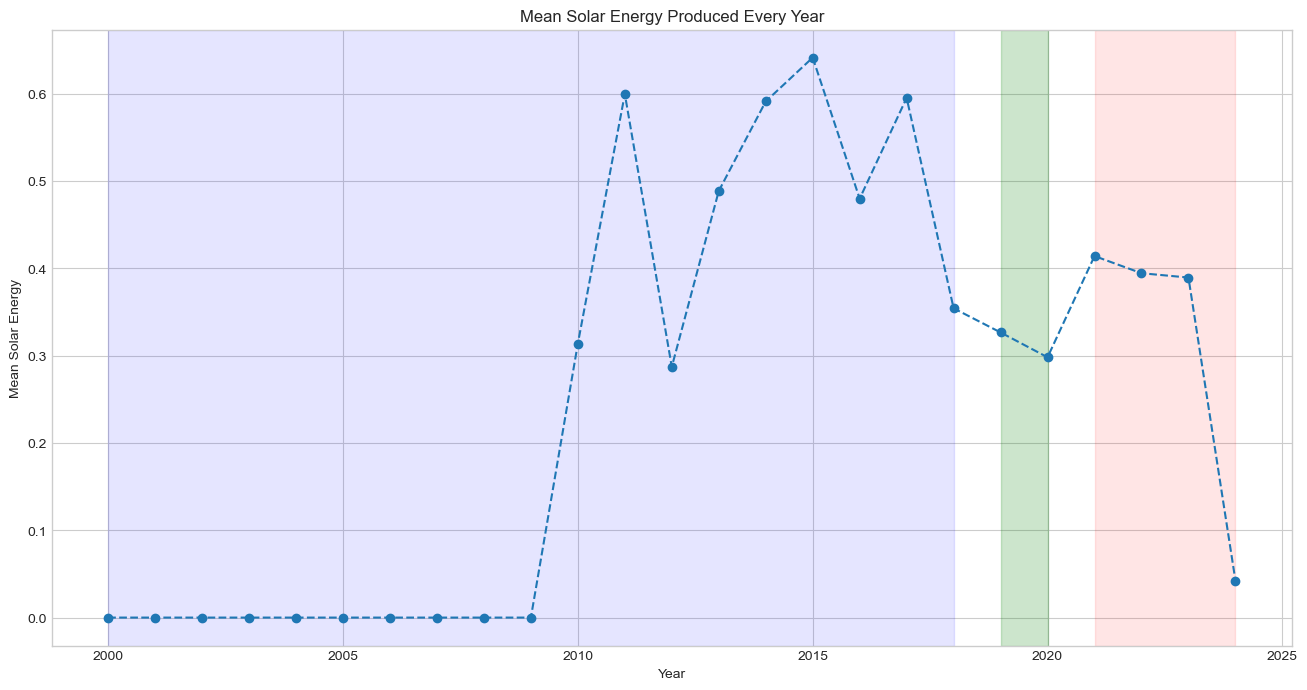

In [26]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(mean_solar_energy_per_year.index, mean_solar_energy_per_year.values,linestyle="--",marker="o")
ax.axvspan(train_data["year"].min(),train_data["year"].max(),alpha=0.1,color="blue")
ax.axvspan(validation_data["year"].min(),validation_data["year"].max(),alpha=0.2,color="green")
ax.axvspan(test_data["year"].min(),test_data["year"].max(),alpha=0.1,color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Mean Solar Energy")
ax.set_title("Mean Solar Energy Produced Every Year")
plt.show()

It seems like there was no solar energy produced till 2009. Maybe the solar energy was not introduced in colchester till 2009. Maybe because of the lack of popularity of solar power could be one of the reason of solar power not being introduced. Since our main objective is also to forecast the solarenergy and if there is no solar being used from 2000 to 2009 then the data between those years is not useful for us. So going further we will discard those data.

### Discarding Unwanted Data

In [94]:
# removing the data from 2000 to 2009 since there are no solar energy data for this period.
df = train_data[~train_data["year"].isin(np.arange(2000,2010,1))]
df.head()

datetime  temp  dew  humidity  precip  precipprob  \
81911  2010-01-01 00:00:00   0.5 -0.2     95.56   0.195       100.0   
81912  2010-01-01 01:00:00   0.3 -0.6     93.41   0.000         0.0   
81913  2010-01-01 02:00:00   0.2 -0.8     92.79   0.000         0.0   
81914  2010-01-01 03:00:00  -0.1 -0.7     95.73   0.000         0.0   
81915  2010-01-01 04:00:00  -1.2 -1.8     95.70   0.000         0.0   

      preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
81911  rain,snow   0.0        0.0       19.0     31.0            1000.9   
81912        NaN   0.0        0.0       13.5     32.0            1000.5   
81913        NaN   0.0        0.0       14.3     26.0            1000.6   
81914        NaN   0.0        0.0       11.4     17.0            1000.7   
81915        NaN   0.0        0.0       13.6    354.0            1000.7   

       cloudcover  solarradiation  solarenergy  uvindex  year  
81911        28.9             NaN          NaN      NaN  2010  
81912        33.8             NaN          NaN      NaN  2010  
81913        42.1             NaN          NaN      NaN  2010  
81914        68.5             NaN          NaN      NaN  2010  
81915        19.2             NaN          NaN      NaN  2010

Let's split the datetime to month, day and time feature, so that it will be easier to explore the data.

In [95]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["time"] = df["datetime"].dt.time
df["date"] = df["datetime"].dt.date

df.set_index("date",inplace=True)

Here, we have used data from 2010 - 2018 for training and 2019 - 2020 for validation and 2021 - 2024 for testing.

In [29]:
# getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66408 entries, 2010-01-01 to 2018-12-31
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          66408 non-null  datetime64[ns]
 1   temp              66254 non-null  float64       
 2   dew               66262 non-null  float64       
 3   humidity          66246 non-null  float64       
 4   precip            66268 non-null  float64       
 5   precipprob        66265 non-null  float64       
 6   preciptype        7870 non-null   object        
 7   snow              66220 non-null  float64       
 8   snowdepth         66216 non-null  float64       
 9   windspeed         66263 non-null  float64       
 10  winddir           66276 non-null  float64       
 11  sealevelpressure  66234 non-null  float64       
 12  cloudcover        66258 non-null  float64       
 13  solarradiation    55996 non-null  float64       
 14  solarenergy  

In [30]:
df.describe().T

count                           mean                  min  \
datetime            66408  2014-07-13 18:27:59.002529792  2010-01-01 00:00:00   
temp              66254.0                      10.453702                 -9.6   
dew               66262.0                        7.22122                -10.8   
humidity          66246.0                      82.101522                27.75   
precip            66268.0                       0.068869                  0.0   
precipprob        66265.0                      11.840338                  0.0   
snow              66220.0                       0.001778                  0.0   
snowdepth         66216.0                       0.132235                  0.0   
windspeed         66263.0                      15.790944                  0.0   
winddir           66276.0                     196.740977                  1.0   
sealevelpressure  66234.0                    1014.642632                968.6   
cloudcover        66258.0                      58.926029                  0.0   
solarradiation    55996.0                     136.290723                  0.0   
solarenergy       56011.0                       0.490106                  0.0   
uvindex           56012.0                       1.351157                  0.0   
year              66408.0                    2014.028822               2010.0   
month             66408.0                       6.544031                  1.0   
day               66408.0                      15.857306                  1.0   

                                  25%                  50%  \
datetime          2012-05-01 17:45:00  2014-07-22 11:30:00   
temp                              5.9                 10.4   
dew                               3.5                  7.6   
humidity                         74.1                 86.2   
precip                            0.0                  0.0   
precipprob                        0.0                  0.0   
snow                              0.0                  0.0   
snowdepth                         0.0                  0.0   
windspeed                        10.2                 14.5   
winddir                         123.0                217.0   
sealevelpressure               1008.5               1015.5   
cloudcover                       32.7                 66.8   
solarradiation                    0.0                  5.5   
solarenergy                       0.0                  0.0   
uvindex                           0.0                  0.0   
year                           2012.0               2014.0   
month                             4.0                  7.0   
day                               8.0                 16.0   

                                  75%                  max         std  
datetime          2016-10-11 05:15:00  2018-12-31 23:00:00         NaN  
temp                             14.8                 31.9    6.164333  
dew                              11.1                 20.6    5.066472  
humidity                        93.37                100.0   14.320668  
precip                            0.0               84.324     0.73352  
precipprob                        0.0                100.0    32.30876  
snow                              0.0                  9.1    0.060292  
snowdepth                         0.0                15.23     0.92954  
windspeed                        20.3                 62.2    7.653538  
winddir                         267.0                360.0   96.722152  
sealevelpressure               1021.7               1045.4   10.553263  
cloudcover                       87.7                100.0   32.640417  
solarradiation                  200.6                939.0  214.787117  
solarenergy                       0.7                  3.4    0.774169  
uvindex                           2.0                  9.0     2.16608  
year                           2016.0               2018.0    2.577738  
month                            10.0                 12.0  

### Null Values
[go to top](#table-of-contents)

In [31]:
# checking the null value for every feature and converting them into percentage
df.isnull().sum() / df.shape[0] * 100

datetime             0.000000
temp                 0.231900
dew                  0.219853
humidity             0.243947
precip               0.210818
precipprob           0.215336
preciptype          88.149018
snow                 0.283098
snowdepth            0.289122
windspeed            0.218347
winddir              0.198771
sealevelpressure     0.262017
cloudcover           0.225876
solarradiation      15.678834
solarenergy         15.656246
uvindex             15.654740
year                 0.000000
month                0.000000
day                  0.000000
time                 0.000000
dtype: float64

Above we can see that the high preciptype has highest percentage of null values which is around 88% while cloudcover, solarradiation and uvindex has around 15% of null values. Lets plot a histogram for null values to visualize it

In [32]:
# storing null values for plotting a graph
null_vals = df.isnull().sum() / df.shape[0] * 100

# sorting the null values in ascending order
null_vals = null_vals.sort_values()

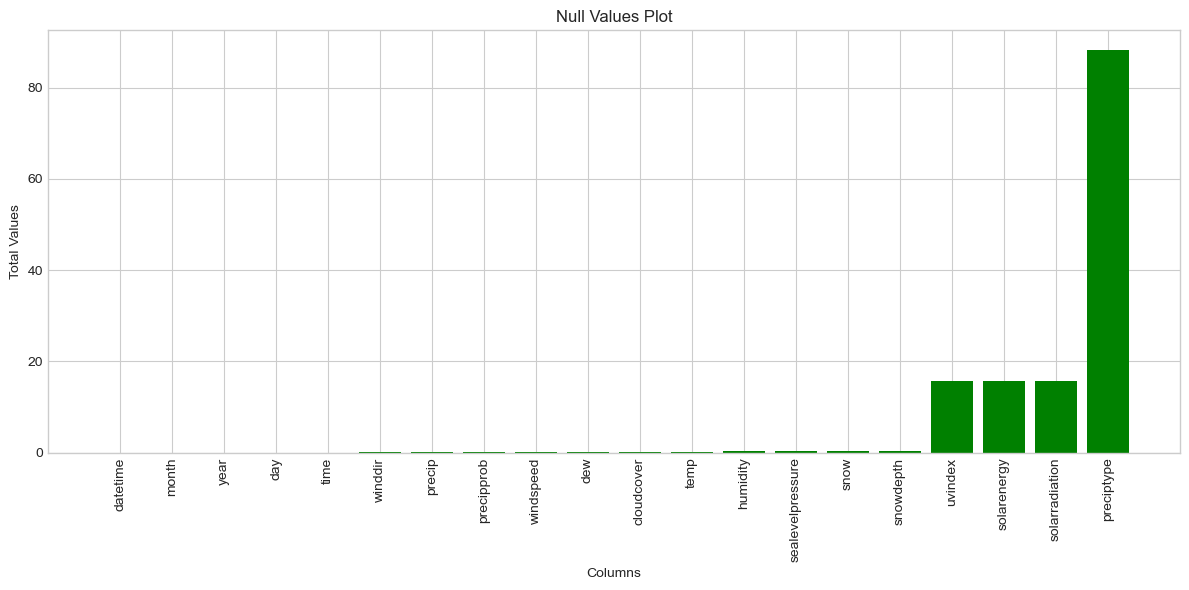

In [33]:

plt.figure(figsize=(12, 6))
plt.bar(null_vals.index, null_vals.values, color='green')
plt.xlabel('Columns')
plt.ylabel('Total Values')
plt.title('Null Values Plot')

# Rotating x-axis labels for cleaner plot
plt.xticks(rotation=90)  
plt.tight_layout()
plt.grid(True)
plt.show()

In the above barplot we can clearly see that preciptype has the highest number of null values, which is followed by solarenergy, uvindex, solarlevelpressure, cloudcover and so on.

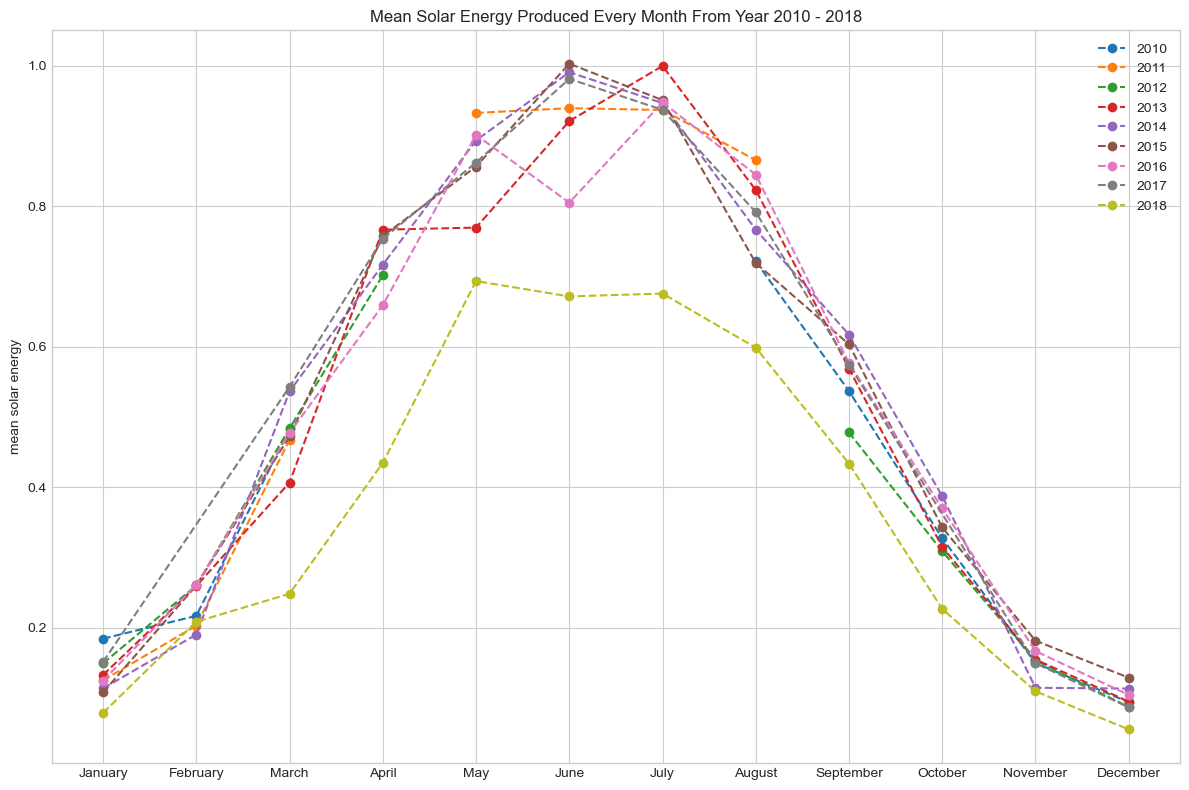

In [96]:
def line_plot_mean_solar_energy_by_month(df):

    # no_solar_energy = []
    plt.figure(figsize=(12,8))

    for idx,i in enumerate(df["year"].unique()):
        # grouping mean solarenergy per year by month
        mean_solarenergy_by_month = df[df["year"] == i].groupby("month")["solarenergy"].mean()

        # mapping each number to month so that it becomes easy to visualize
        mapping_month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
        mean_solarenergy_by_month.index = mean_solarenergy_by_month.index.map(mapping_month)

        plt.plot(mean_solarenergy_by_month,linestyle="--",marker="o",label=f"{i}")
        plt.ylabel("mean solar energy")
        plt.title(f"Mean Solar Energy Produced Every Month From Year 2010 - 2018")
        plt.xticks()
        plt.legend()
        plt.tight_layout()
    

line_plot_mean_solar_energy_by_month(df)

As it can be seen from the plot above, solar energy is usually strongest in the months of April, May, June, and July because there is sunlight for the most of time during the summer. But in majority it seems that during summer the solarenergy is highly generated.

In [35]:
df.head()

datetime  temp  dew  humidity  precip  precipprob  \
date                                                                      
2010-01-01 2010-01-01 00:00:00   0.5 -0.2     95.56   0.195       100.0   
2010-01-01 2010-01-01 01:00:00   0.3 -0.6     93.41   0.000         0.0   
2010-01-01 2010-01-01 02:00:00   0.2 -0.8     92.79   0.000         0.0   
2010-01-01 2010-01-01 03:00:00  -0.1 -0.7     95.73   0.000         0.0   
2010-01-01 2010-01-01 04:00:00  -1.2 -1.8     95.70   0.000         0.0   

           preciptype  snow  snowdepth  windspeed  winddir  sealevelpressure  \
date                                                                           
2010-01-01  rain,snow   0.0        0.0       19.0     31.0            1000.9   
2010-01-01        NaN   0.0        0.0       13.5     32.0            1000.5   
2010-01-01        NaN   0.0        0.0       14.3     26.0            1000.6   
2010-01-01        NaN   0.0        0.0       11.4     17.0            1000.7   
2010-01-01        NaN   0.0        0.0       13.6    354.0            1000.7   

            cloudcover  solarradiation  solarenergy  uvindex  year  month  \
date                                                                        
2010-01-01        28.9             NaN          NaN      NaN  2010      1   
2010-01-01        33.8             NaN          NaN      NaN  2010      1   
2010-01-01        42.1             NaN          NaN      NaN  2010      1   
2010-01-01        68.5             NaN          NaN      NaN  2010      1   
2010-01-01        19.2             NaN          NaN      NaN  2010      1   

            day      time  
date                       
2010-01-01    1  00:00:00  
2010-01-01    1  01:00:00  
2010-01-01    1  02:00:00  
2010-01-01    1  03:00:00  
2010-01-01    1  04:00:00

In [36]:
df.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'year', 'month', 'day', 'time'],
      dtype='object')

### Line Plots

In [37]:
# we will select all columns excluding object data type columns.
numerical_columns = df.select_dtypes(exclude="object")
numerical_columns.head()

datetime  temp  dew  humidity  precip  precipprob  snow  \
date                                                                            
2010-01-01 2010-01-01 00:00:00   0.5 -0.2     95.56   0.195       100.0   0.0   
2010-01-01 2010-01-01 01:00:00   0.3 -0.6     93.41   0.000         0.0   0.0   
2010-01-01 2010-01-01 02:00:00   0.2 -0.8     92.79   0.000         0.0   0.0   
2010-01-01 2010-01-01 03:00:00  -0.1 -0.7     95.73   0.000         0.0   0.0   
2010-01-01 2010-01-01 04:00:00  -1.2 -1.8     95.70   0.000         0.0   0.0   

            snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
date                                                                      
2010-01-01        0.0       19.0     31.0            1000.9        28.9   
2010-01-01        0.0       13.5     32.0            1000.5        33.8   
2010-01-01        0.0       14.3     26.0            1000.6        42.1   
2010-01-01        0.0       11.4     17.0            1000.7        68.5   
2010-01-01        0.0       13.6    354.0            1000.7        19.2   

            solarradiation  solarenergy  uvindex  year  month  day  
date                                                                
2010-01-01             NaN          NaN      NaN  2010      1    1  
2010-01-01             NaN          NaN      NaN  2010      1    1  
2010-01-01             NaN          NaN      NaN  2010      1    1  
2010-01-01             NaN          NaN      NaN  2010      1    1  
2010-01-01             NaN          NaN      NaN  2010      1    1

In [38]:
# this function plots the line plot for numerical columns except some features defined below.
def numerical_cols_line_pot(features):

    for i in features:
        if i not in ["month","year","day","datetime"]:

            plt.figure(figsize=(16,8))
            plt.plot(df.index, df[i])
            plt.xlabel('Year')
            plt.ylabel(f'{i}')
            plt.show()

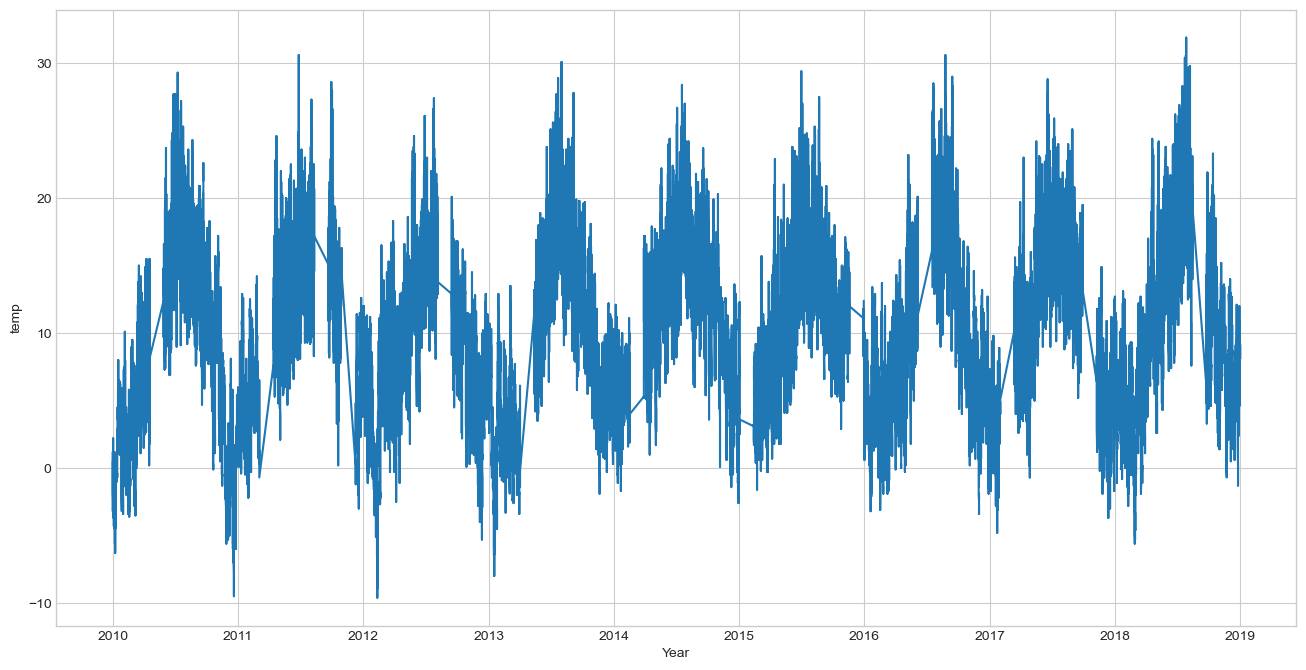

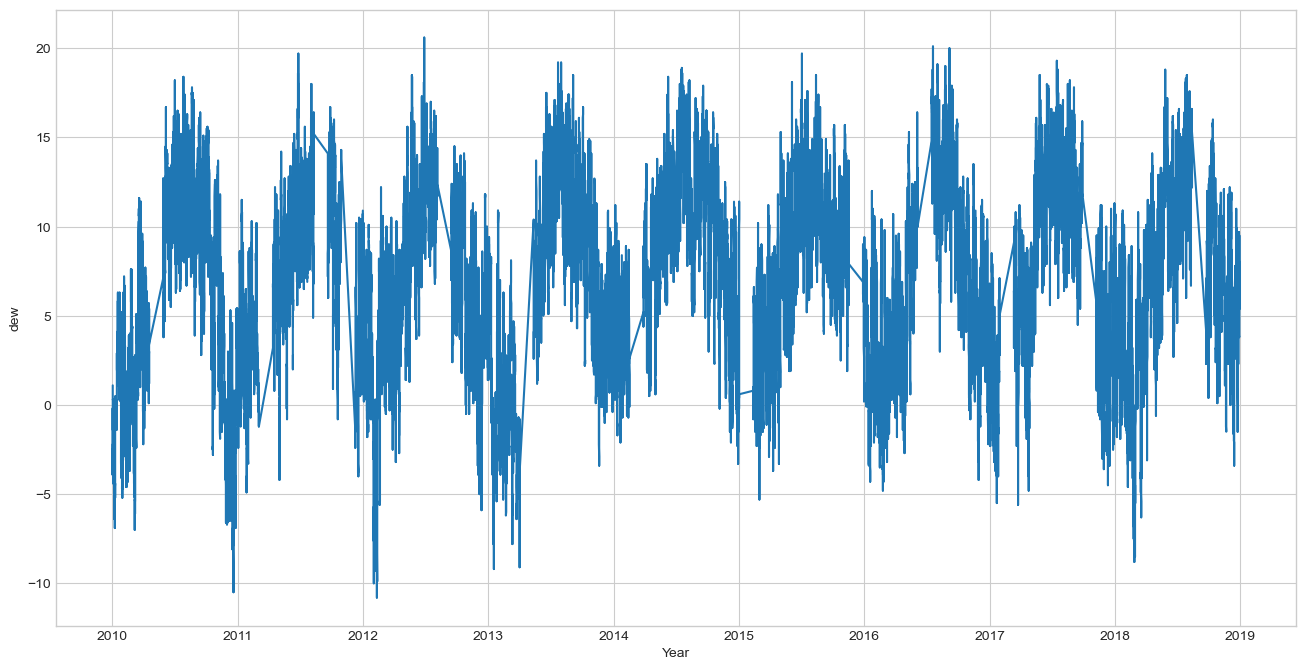

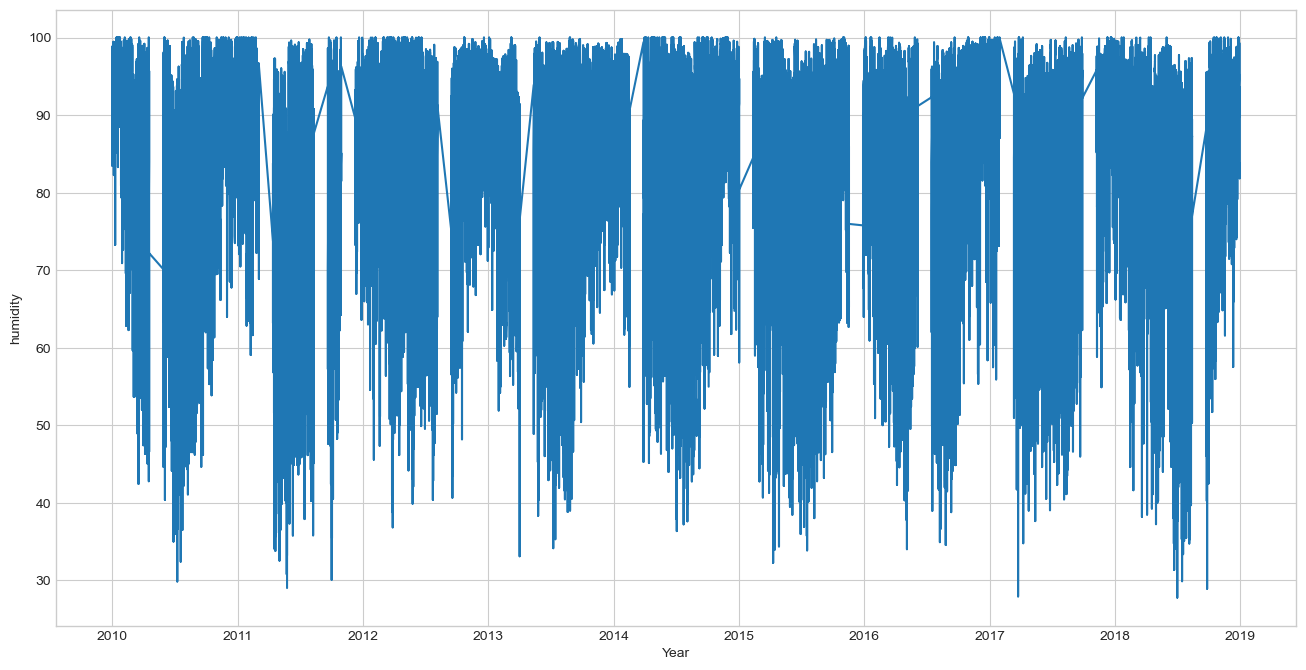

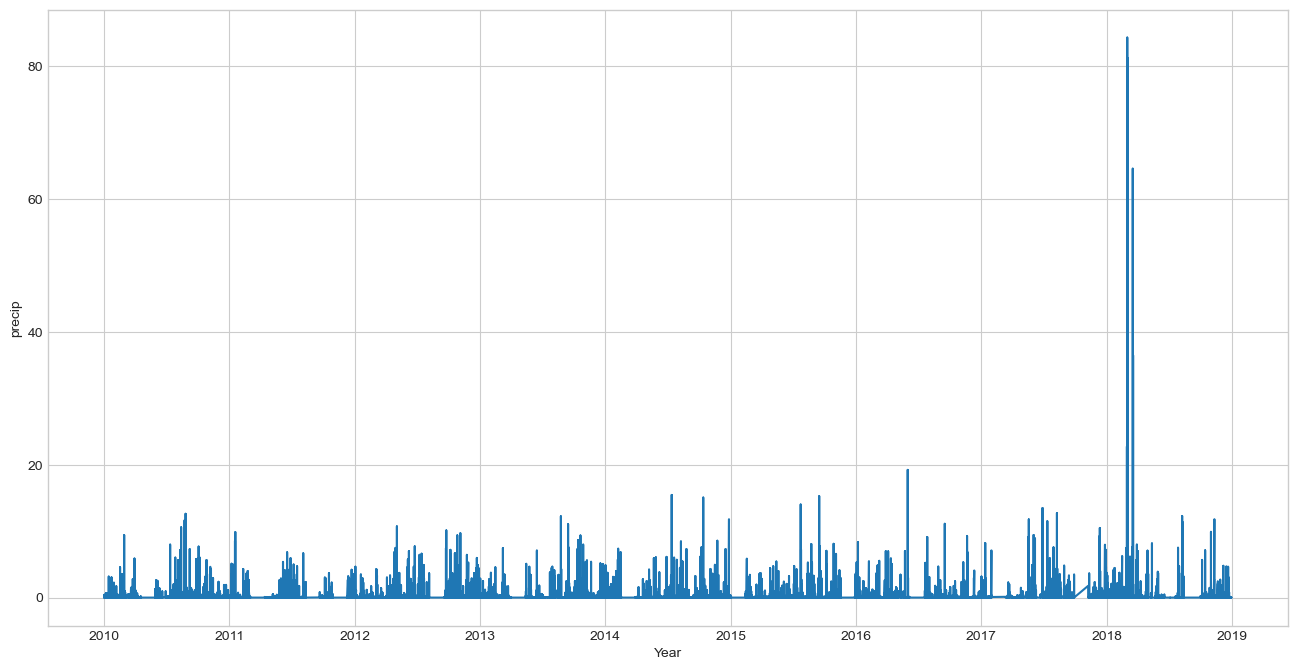

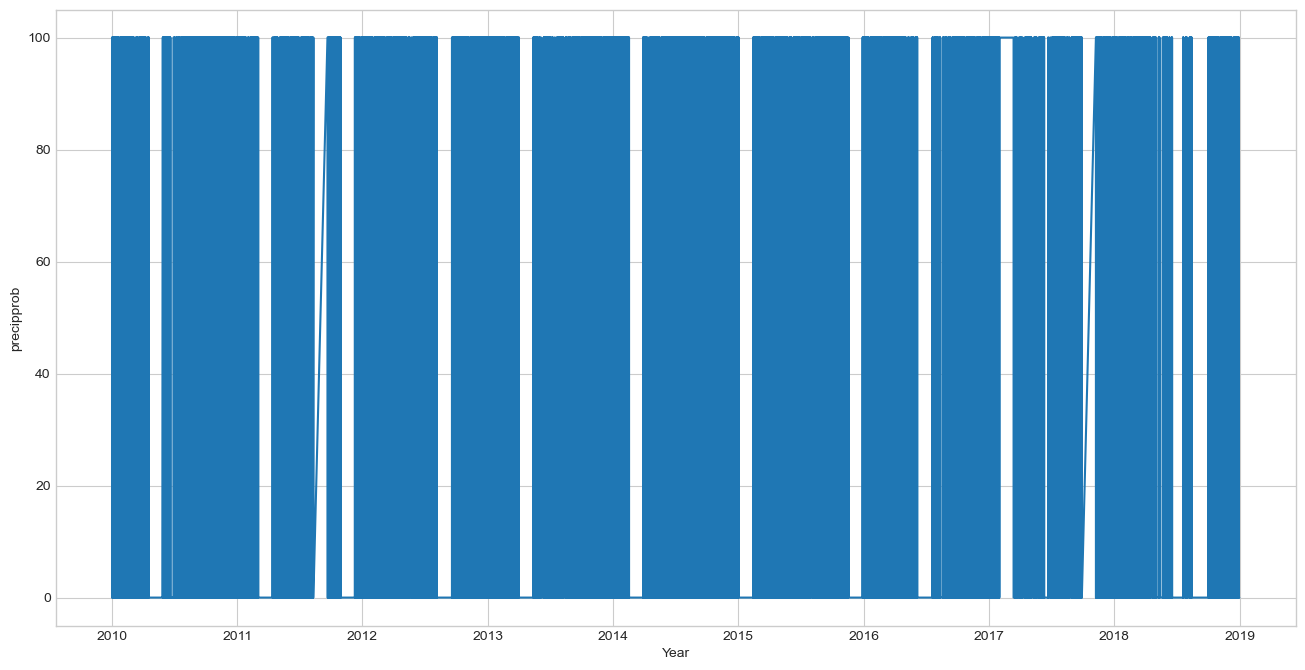

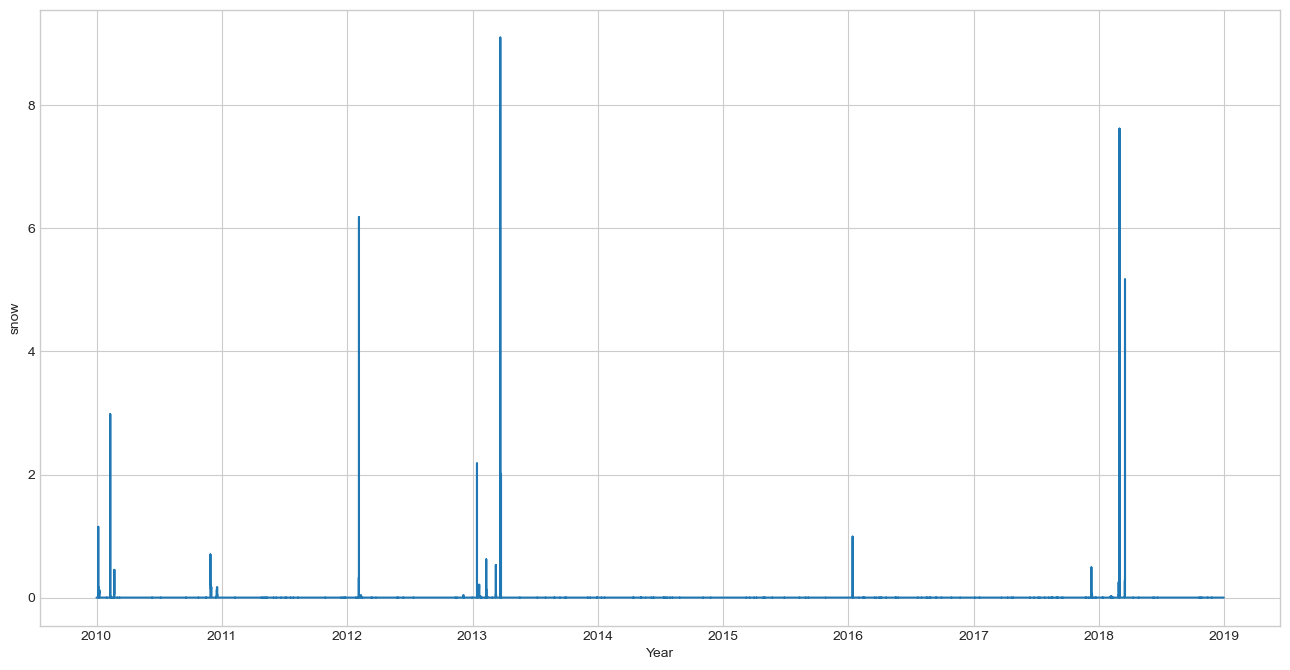

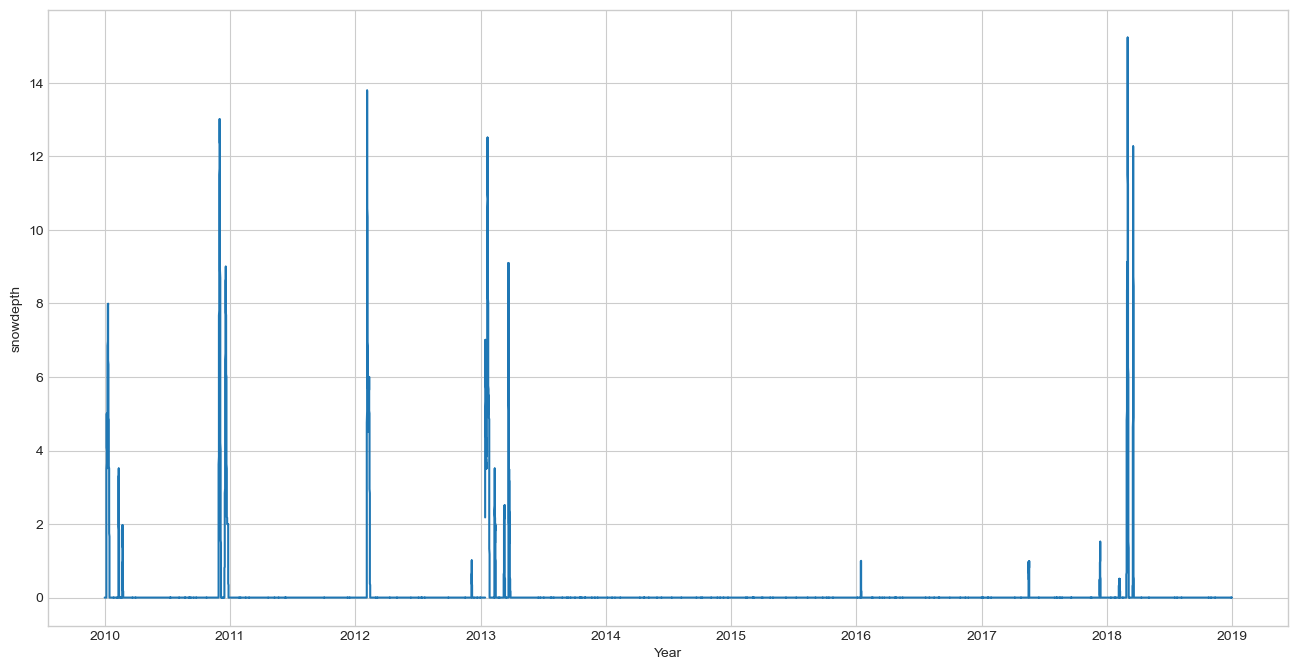

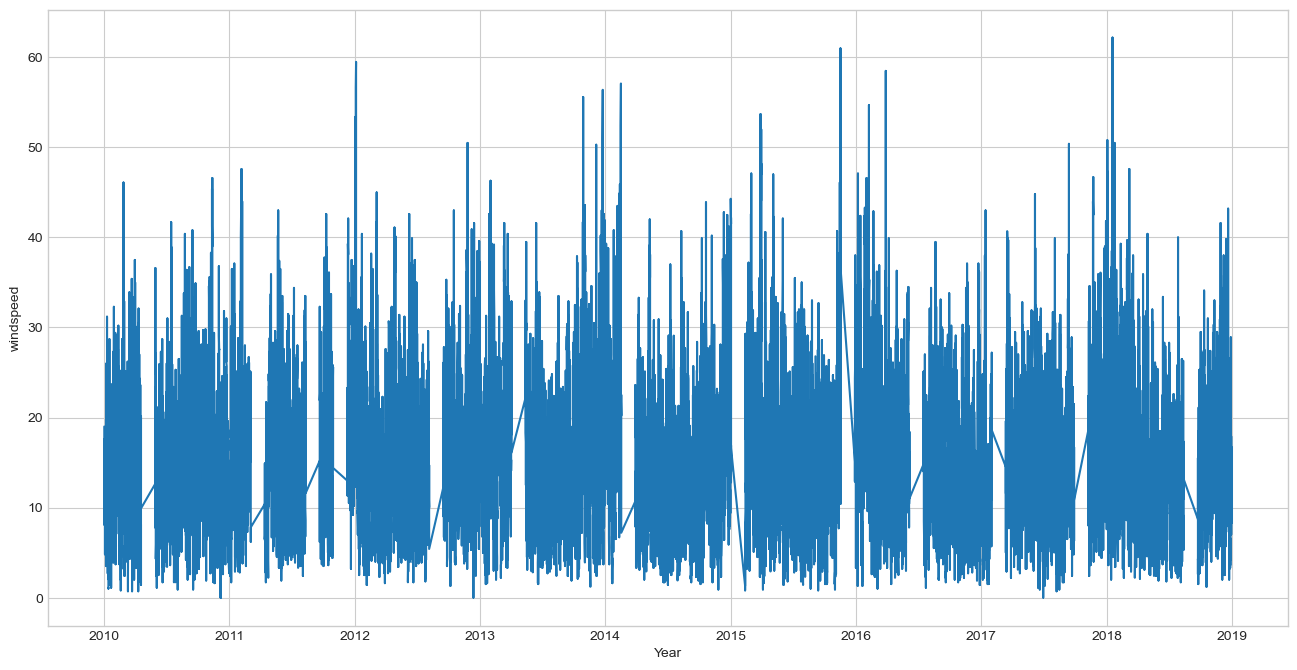

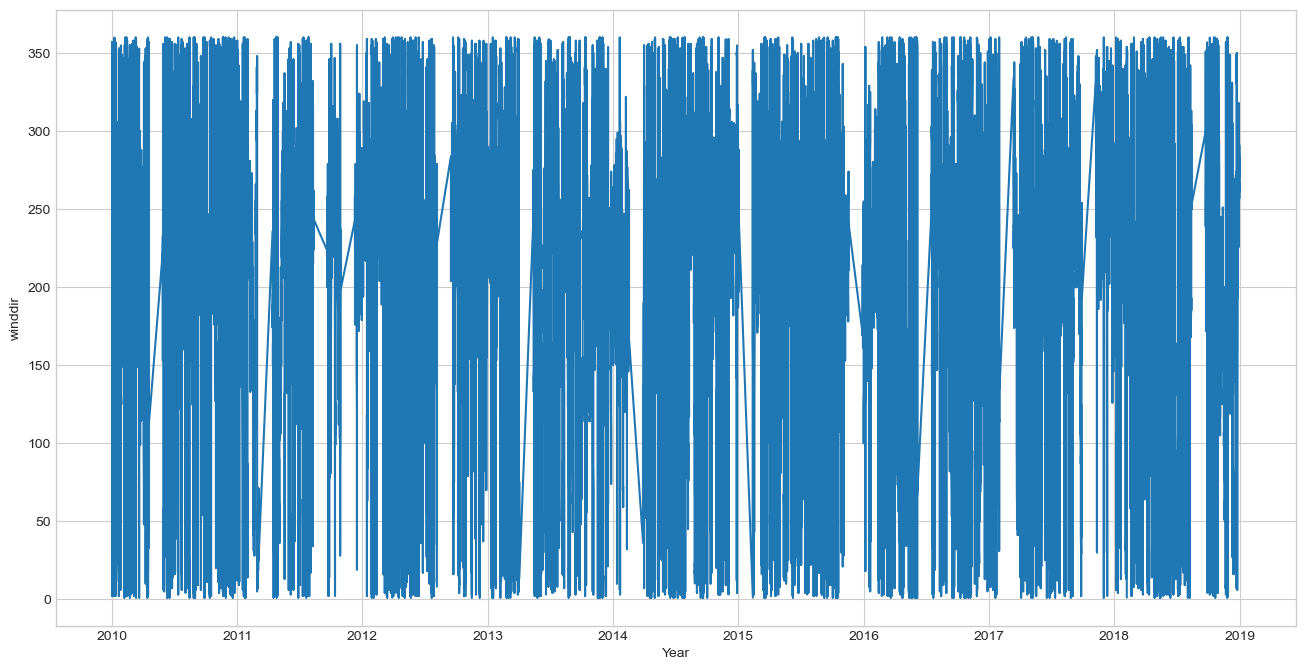

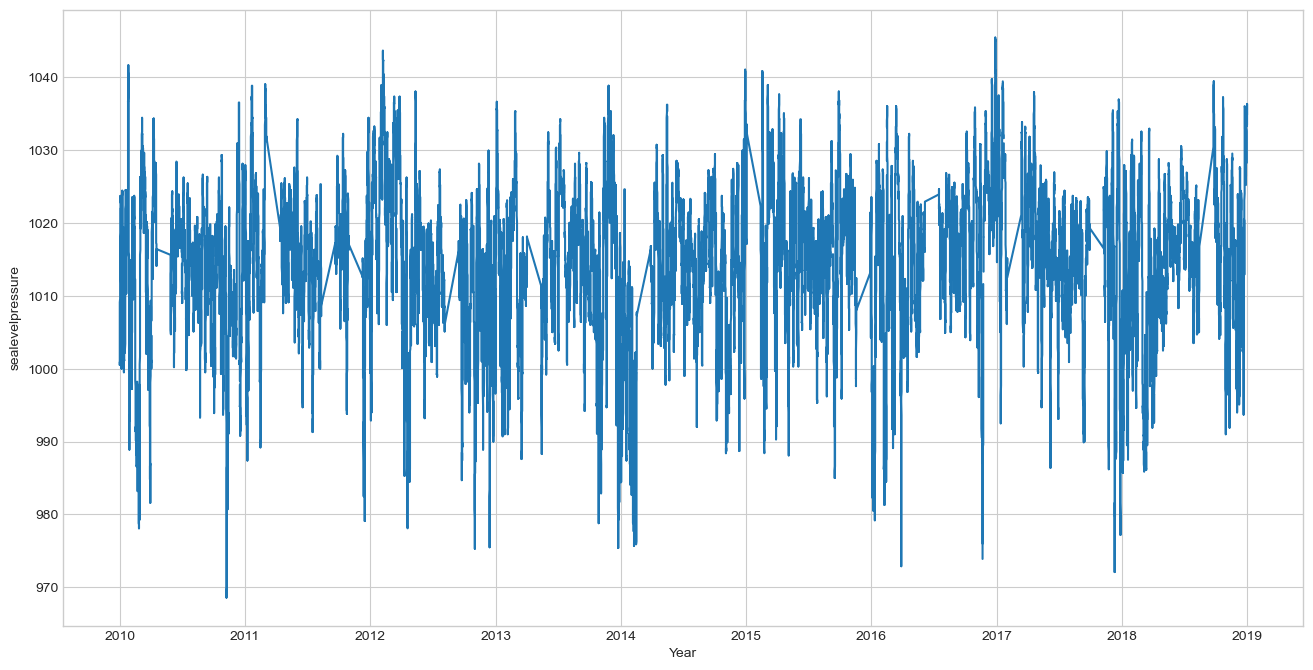

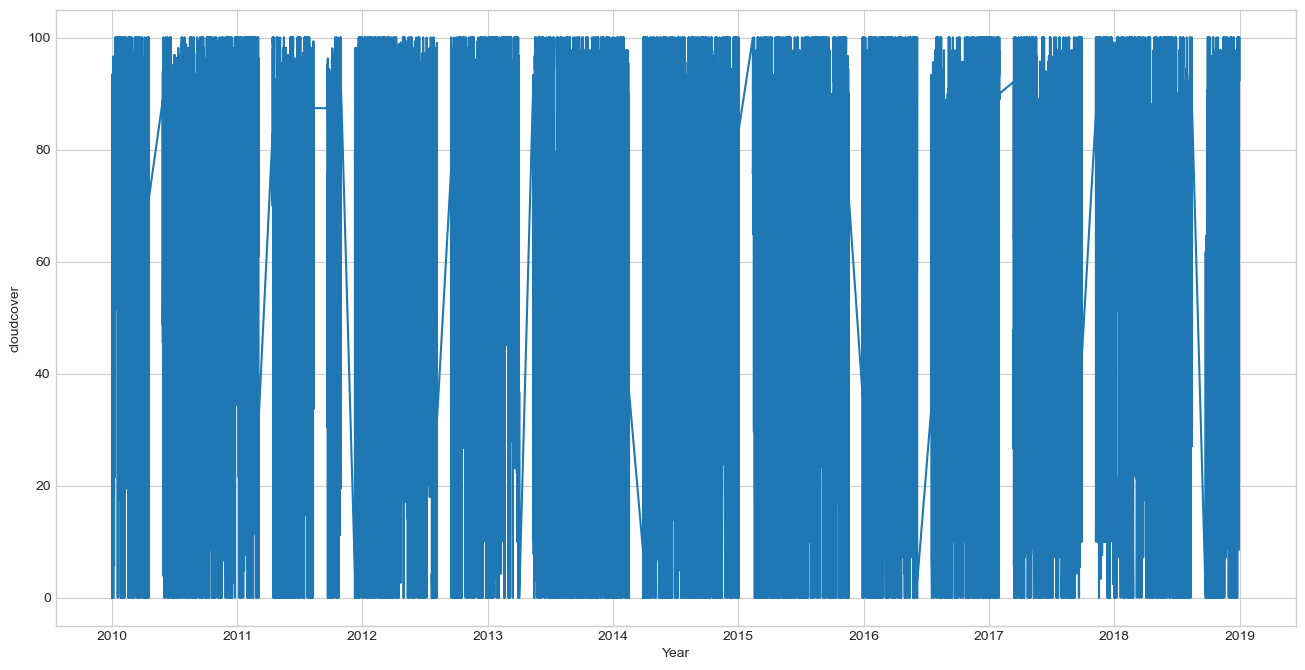

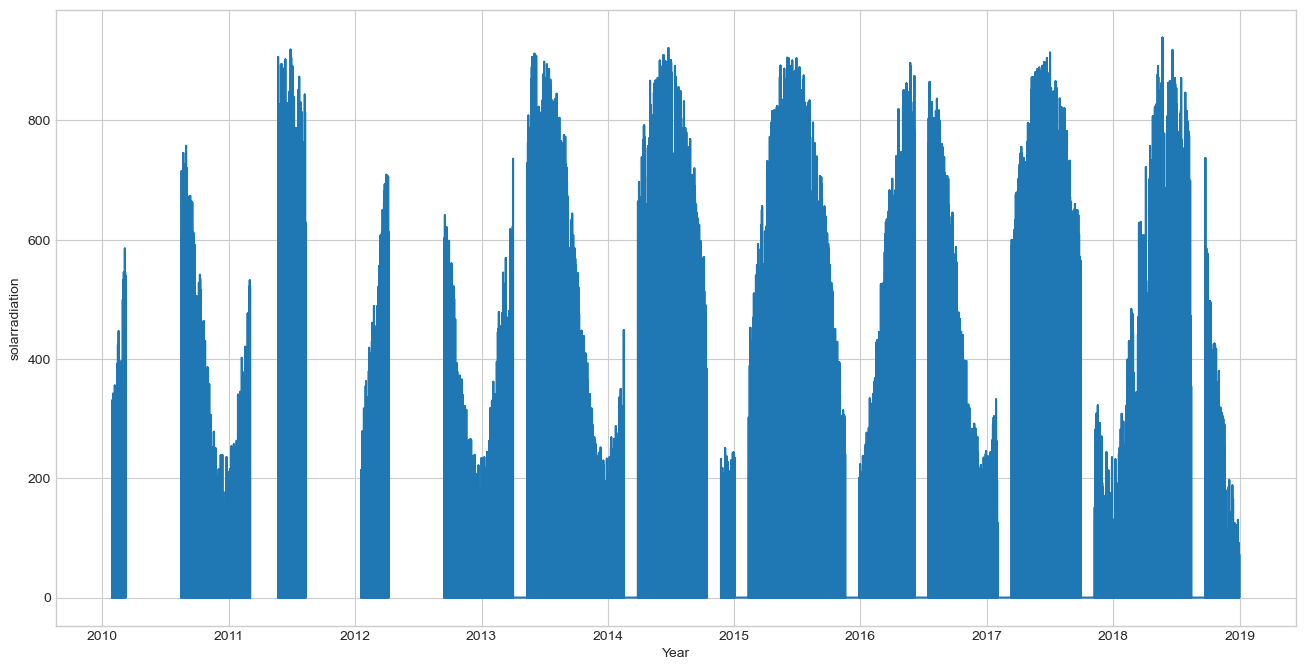

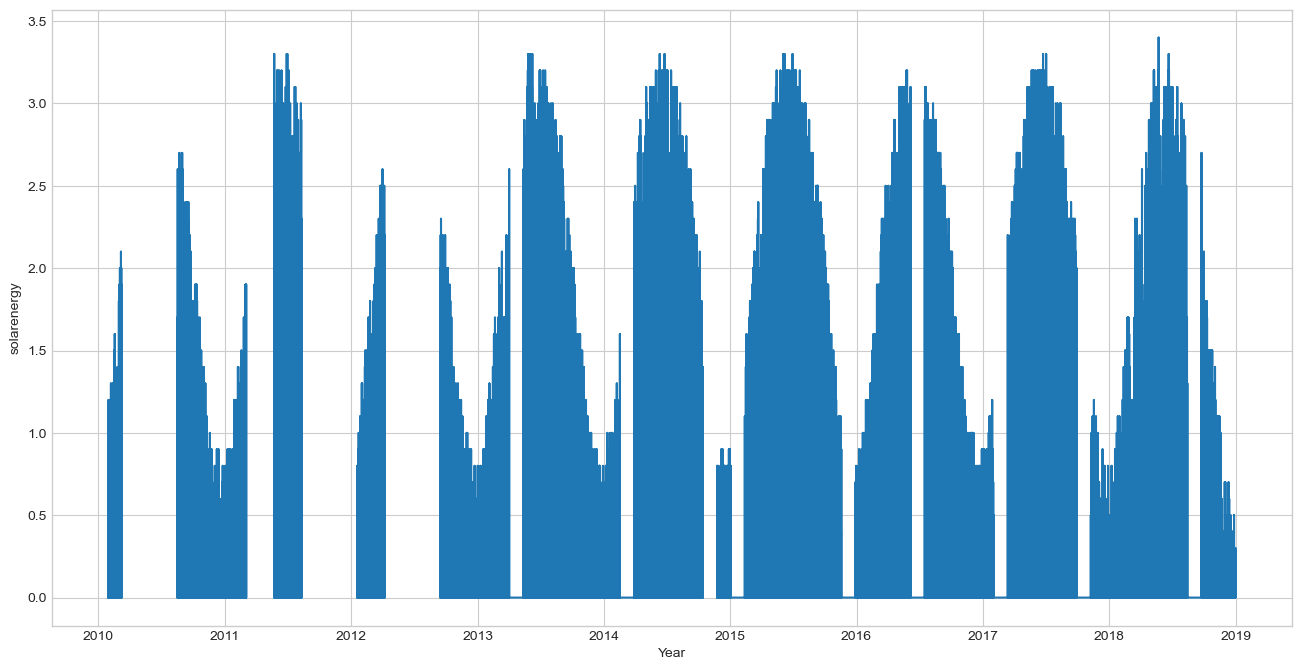

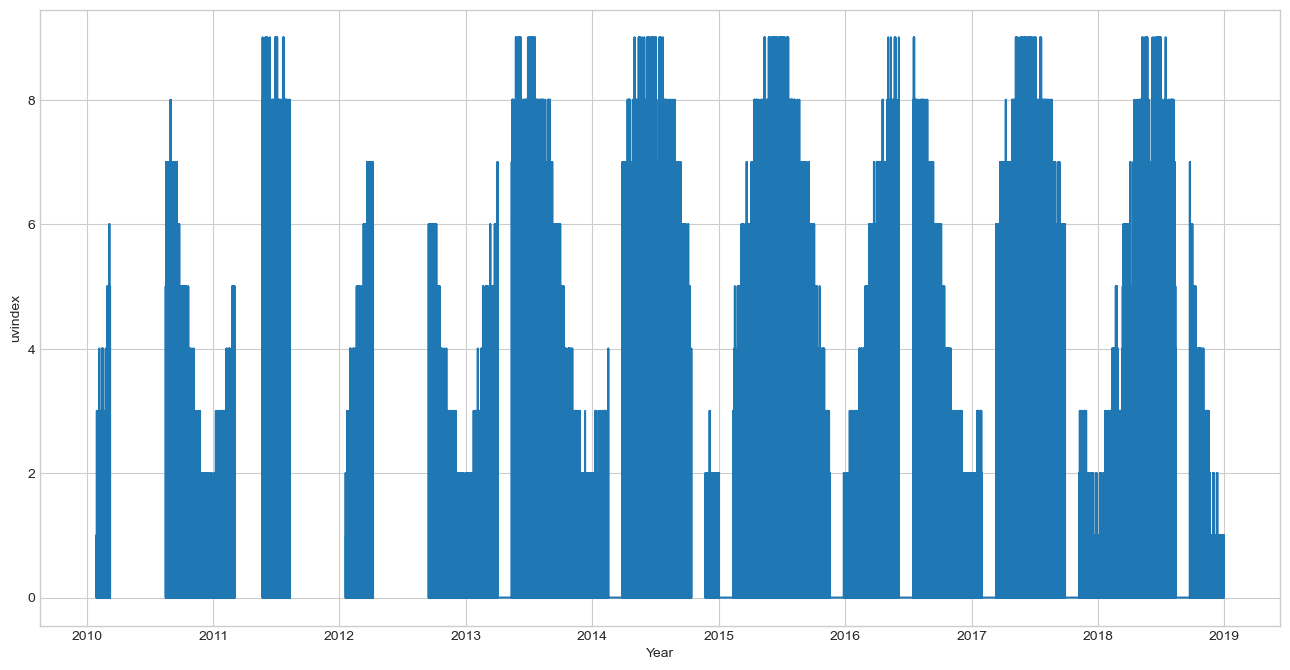

In [39]:
numerical_cols_line_pot(numerical_columns)

From the above plots we found out that : temp, dew, humidity, windspeed, winddir has seasonality.

We can also see that solarenergy,solarradiation and uvindex has kind of similar plots and which means that they might be correlated.

### Mean Line Plots
Lets explore mean of every numerical feature of every year and lets plot a line plot

In [40]:
def mean_line_pot(features):

    for i in features:
        if i not in ["year","month", "day","datetime"]:
            plt.figure()
            mean_feat = df.groupby("year")[i].mean()
            plt.plot(mean_feat, marker="o", linewidth=2,color="green")
            plt.title(f"Mean {i} plot of every year")
    plt.tight_layout()
    plt.show()

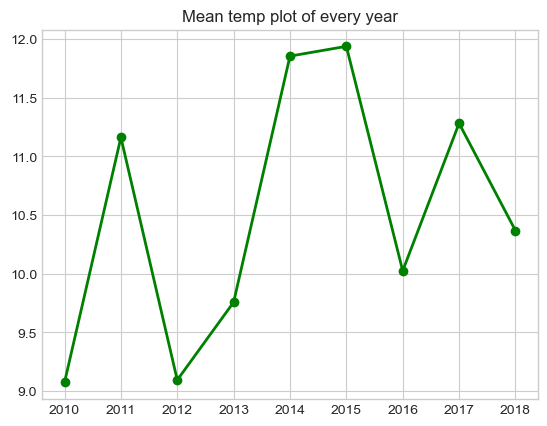

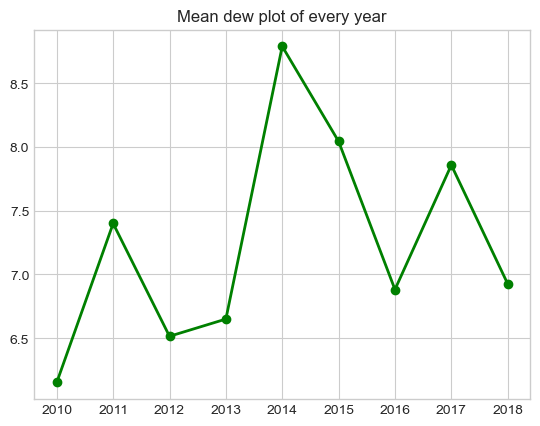

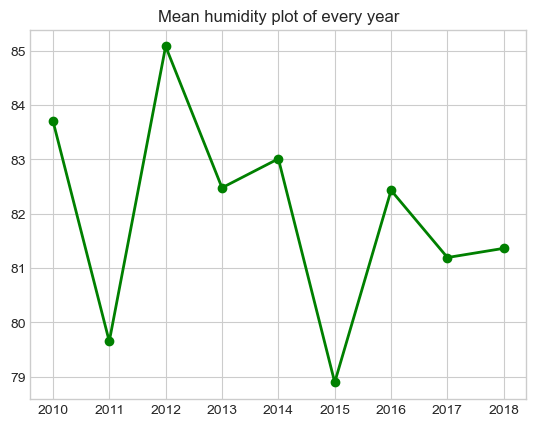

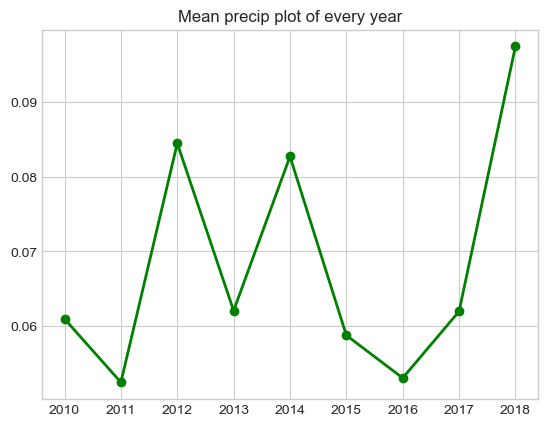

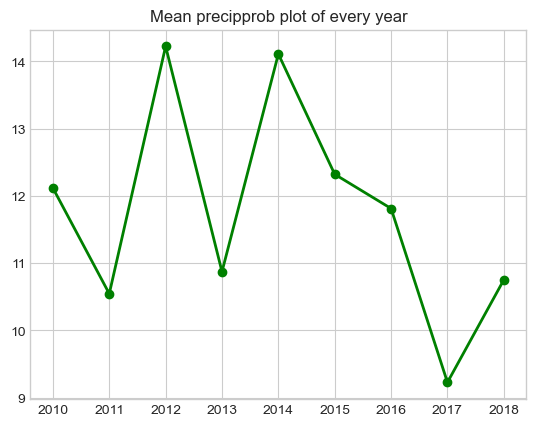

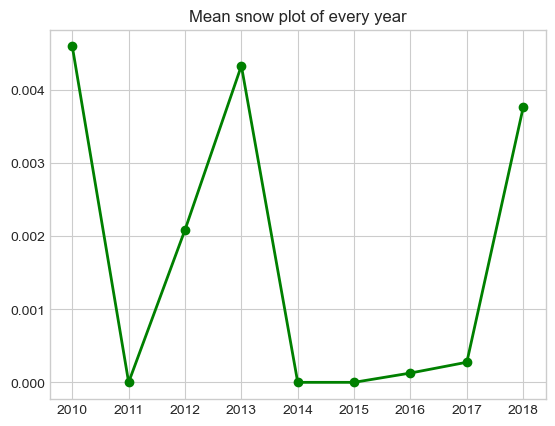

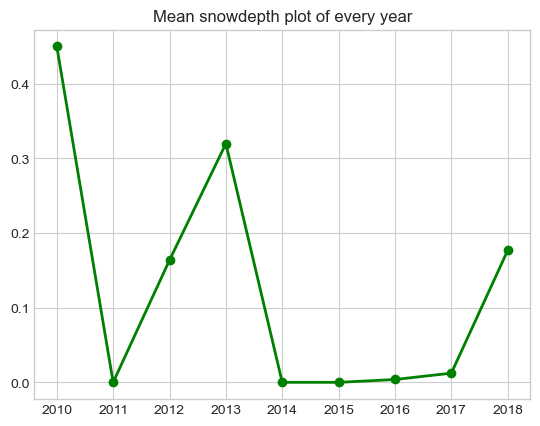

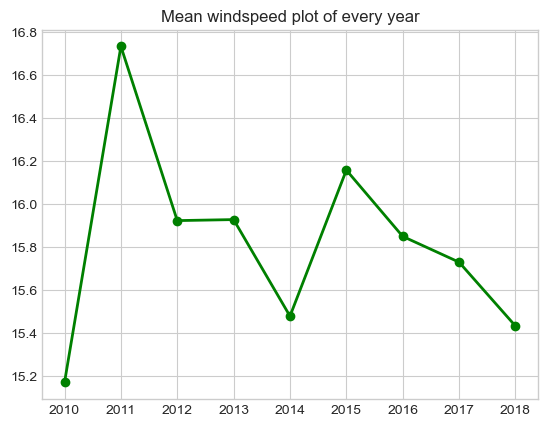

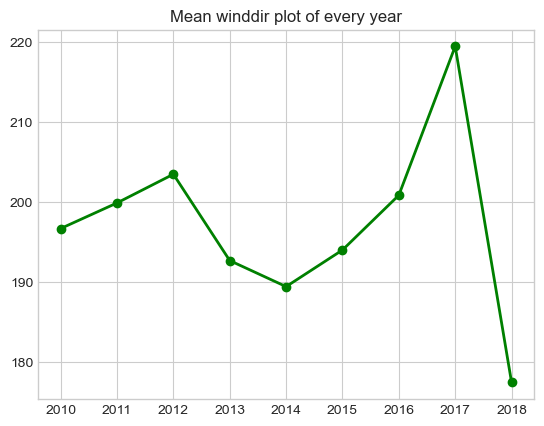

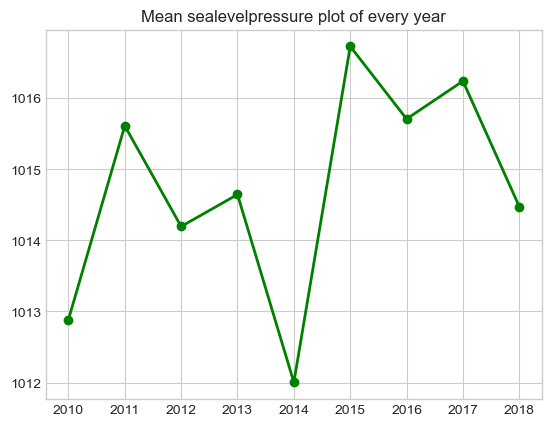

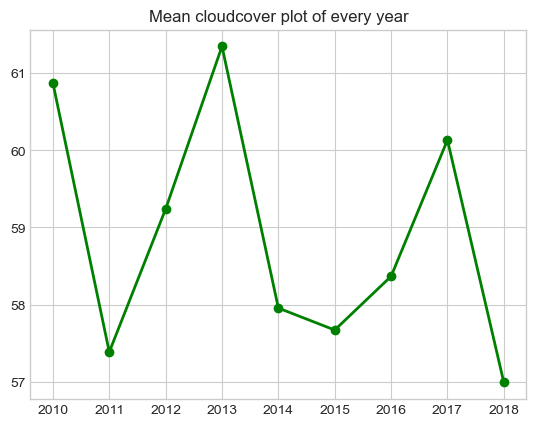

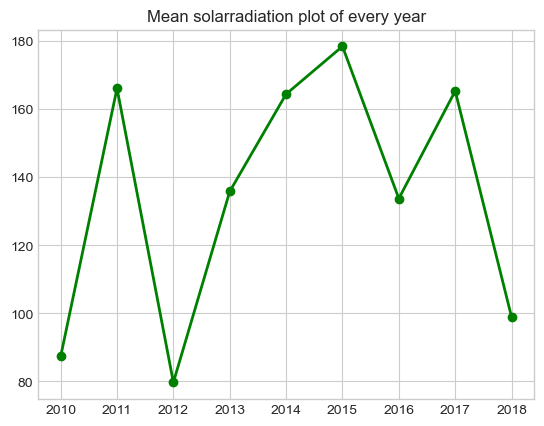

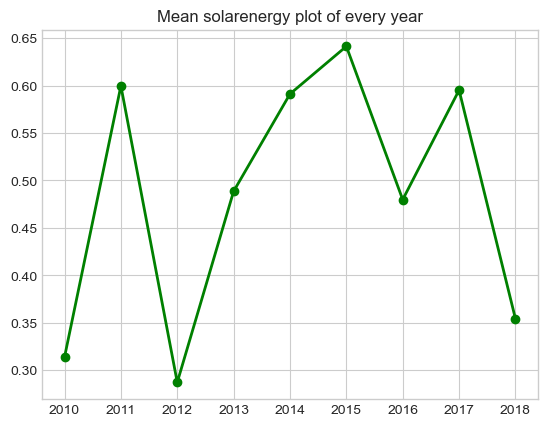

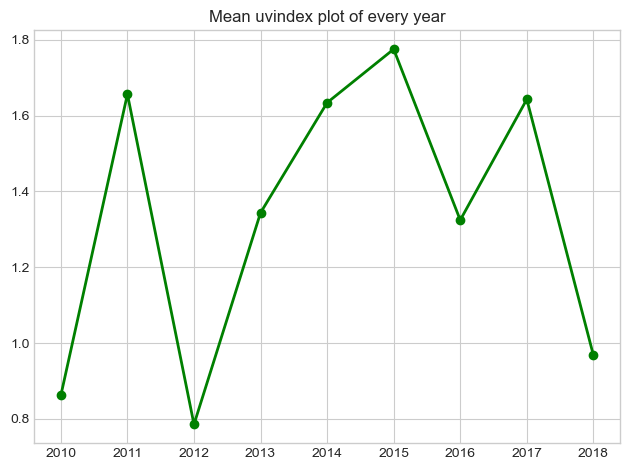

In [41]:
mean_line_pot(numerical_columns)

By looking at the above mean plots we can find out about the highest and lowest points in the plot.
By looking at temperature plot we can say that the lowest mean temperature was on 2010 while the highest was during 2015 which was around 12 degrees. Similarly we can draw conclusion for all of the plots above.

### Seasonal Decomposition

Time series consists of three parts:

 1. Seasonal
 2. Trend
 3. Random/Noise/Residual 

These three can be commbined in additive way where we add all of these three compononents to make a additive time series model or multiplying all these to form a multiplicative time series.


In [42]:
df = df.set_index(df["datetime"])

In [43]:
df.head()

datetime  temp  dew  humidity  precip  \
datetime                                                               
2010-01-01 00:00:00 2010-01-01 00:00:00   0.5 -0.2     95.56   0.195   
2010-01-01 01:00:00 2010-01-01 01:00:00   0.3 -0.6     93.41   0.000   
2010-01-01 02:00:00 2010-01-01 02:00:00   0.2 -0.8     92.79   0.000   
2010-01-01 03:00:00 2010-01-01 03:00:00  -0.1 -0.7     95.73   0.000   
2010-01-01 04:00:00 2010-01-01 04:00:00  -1.2 -1.8     95.70   0.000   

                     precipprob preciptype  snow  snowdepth  windspeed  \
datetime                                                                 
2010-01-01 00:00:00       100.0  rain,snow   0.0        0.0       19.0   
2010-01-01 01:00:00         0.0        NaN   0.0        0.0       13.5   
2010-01-01 02:00:00         0.0        NaN   0.0        0.0       14.3   
2010-01-01 03:00:00         0.0        NaN   0.0        0.0       11.4   
2010-01-01 04:00:00         0.0        NaN   0.0        0.0       13.6   

                     winddir  sealevelpressure  cloudcover  solarradiation  \
datetime                                                                     
2010-01-01 00:00:00     31.0            1000.9        28.9             NaN   
2010-01-01 01:00:00     32.0            1000.5        33.8             NaN   
2010-01-01 02:00:00     26.0            1000.6        42.1             NaN   
2010-01-01 03:00:00     17.0            1000.7        68.5             NaN   
2010-01-01 04:00:00    354.0            1000.7        19.2             NaN   

                     solarenergy  uvindex  year  month  day      time  
datetime                                                               
2010-01-01 00:00:00          NaN      NaN  2010      1    1  00:00:00  
2010-01-01 01:00:00          NaN      NaN  2010      1    1  01:00:00  
2010-01-01 02:00:00          NaN      NaN  2010      1    1  02:00:00  
2010-01-01 03:00:00          NaN      NaN  2010      1    1  03:00:00  
2010-01-01 04:00:00          NaN      NaN  2010      1    1  04:00:00

In [44]:
# here we are sampling one value per month.
temp_resample = df['temp'].resample('M').mean().ffill().to_frame()  
temp_resample

temp
datetime             
2010-01-31   1.277389
2010-02-28   2.646338
2010-03-31   6.139324
2010-04-30   7.864501
2010-05-31  12.669444
...               ...
2018-08-31  19.121194
2018-09-30  11.434731
2018-10-31  11.196635
2018-11-30   8.307799
2018-12-31   6.974866

[108 rows x 1 columns]

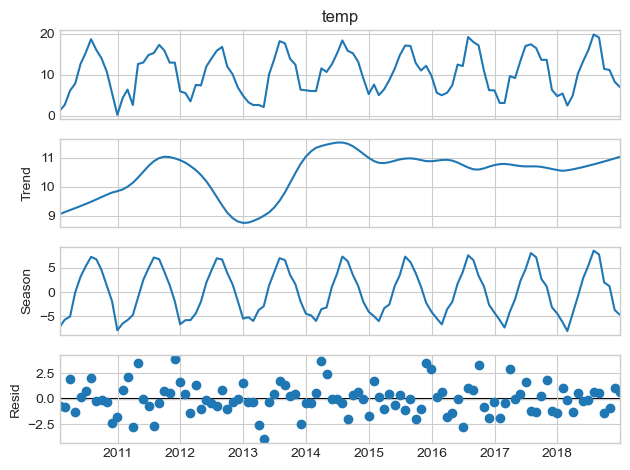

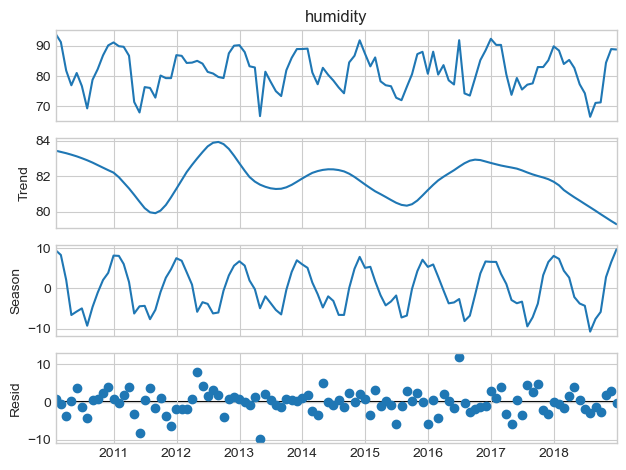

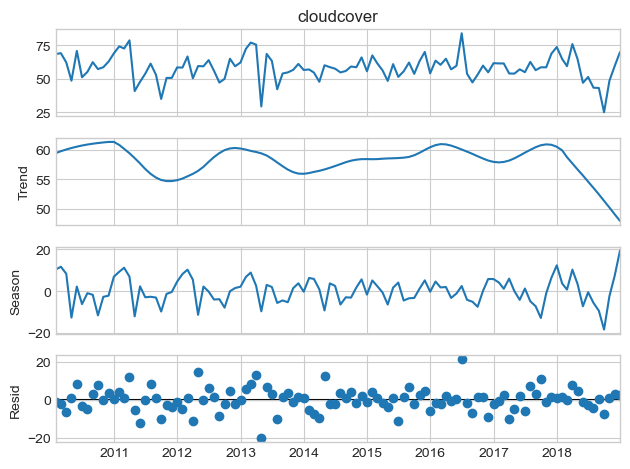

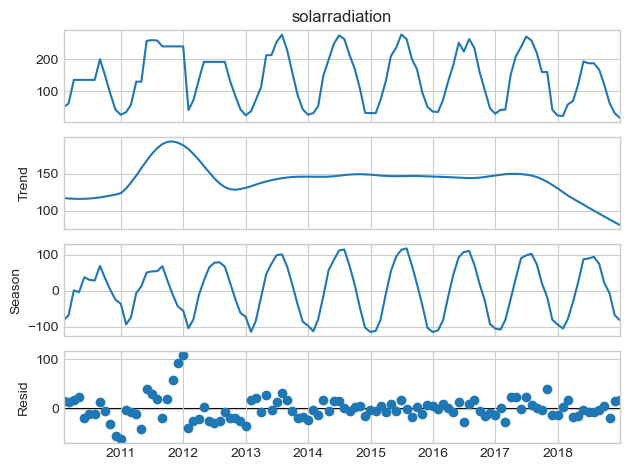

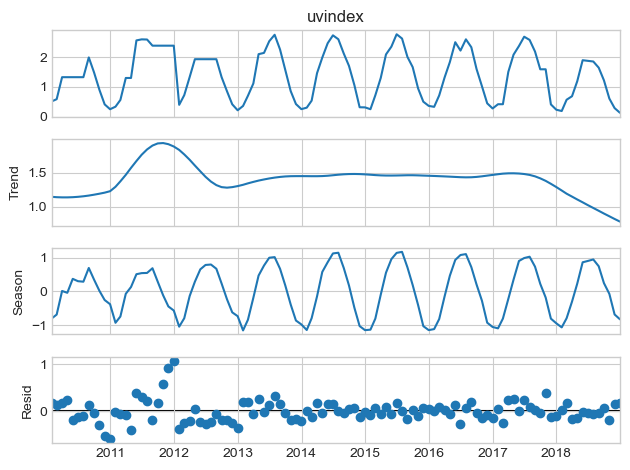

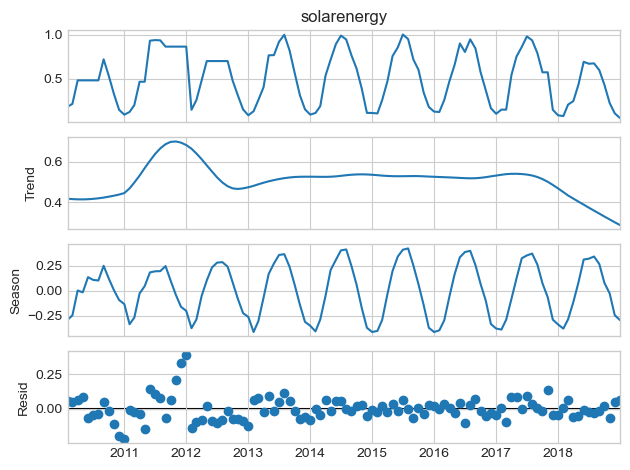

In [45]:
def resample_and_decompose(df,features):
    for i in features:
        # we take one value for each month
        resampled_data = df[i].resample('M').mean().ffill()
        decomposed_data = STL(resampled_data).fit()
        decomposed_data.plot()
        plt.show()

features = ["temp","humidity","cloudcover","solarradiation","uvindex","solarenergy"]
resample_and_decompose(df,features)

From the above decomposition plots we can determine:

    1. temp - there is not a clear trend on this but it goes on low during 2015 which again becomes static after coming up. The seasonal components repeats every year.

    2. humidity - there is no clear trend for this but there is a seasonality for this feature.

    3. cloudcover - there is no clear trend for this and no seasonality for this column.

    4. solarenergy, solarradiation and uvindex has similar type of seasonality. All of them have similar kind of trends but the trends seems to be static.
    
    

# Feature Engineering and Selection

### Handling Missing Values

In [46]:
df.isnull().sum()/df.shape[0]

datetime            0.000000
temp                0.002319
dew                 0.002199
humidity            0.002439
precip              0.002108
precipprob          0.002153
preciptype          0.881490
snow                0.002831
snowdepth           0.002891
windspeed           0.002183
winddir             0.001988
sealevelpressure    0.002620
cloudcover          0.002259
solarradiation      0.156788
solarenergy         0.156562
uvindex             0.156547
year                0.000000
month               0.000000
day                 0.000000
time                0.000000
dtype: float64

In [47]:
# making a chunk of dataframe which makes easier to visualize the data.

starting_date = pd.to_datetime("2010-02-10").date()
ending_date = pd.to_datetime("2010-08-25").date()
df_chunk = df.loc[starting_date:ending_date]
df_chunk.head()

datetime  temp  dew  humidity  precip  \
datetime                                                               
2010-02-10 00:00:00 2010-02-10 00:00:00   0.9  0.1     94.19   0.022   
2010-02-10 01:00:00 2010-02-10 01:00:00   1.0  0.3     94.65   0.000   
2010-02-10 02:00:00 2010-02-10 02:00:00   1.1  0.3     94.39   0.000   
2010-02-10 03:00:00 2010-02-10 03:00:00   1.1  0.2     93.86   0.000   
2010-02-10 04:00:00 2010-02-10 04:00:00   1.1  0.2     93.41   0.000   

                     precipprob preciptype  snow  snowdepth  windspeed  \
datetime                                                                 
2010-02-10 00:00:00       100.0  rain,snow   0.0        0.0       18.6   
2010-02-10 01:00:00         0.0        NaN   0.0        0.0       19.7   
2010-02-10 02:00:00         0.0        NaN   0.0        0.0       18.2   
2010-02-10 03:00:00         0.0        NaN   0.0        0.0       22.8   
2010-02-10 04:00:00         0.0        NaN   0.0        0.0       23.8   

                     winddir  sealevelpressure  cloudcover  solarradiation  \
datetime                                                                     
2010-02-10 00:00:00    334.0            1012.5        79.1             0.0   
2010-02-10 01:00:00    327.0            1012.0        94.3             0.0   
2010-02-10 02:00:00    327.0            1011.8        96.3             0.0   
2010-02-10 03:00:00    329.0            1011.6        96.3             0.0   
2010-02-10 04:00:00    329.0            1011.5        94.3             0.0   

                     solarenergy  uvindex  year  month  day      time  
datetime                                                               
2010-02-10 00:00:00          0.0      0.0  2010      2   10  00:00:00  
2010-02-10 01:00:00          0.0      0.0  2010      2   10  01:00:00  
2010-02-10 02:00:00          0.0      0.0  2010      2   10  02:00:00  
2010-02-10 03:00:00          0.0      0.0  2010      2   10  03:00:00  
2010-02-10 04:00:00          0.0      0.0  2010      2   10  04:00:00

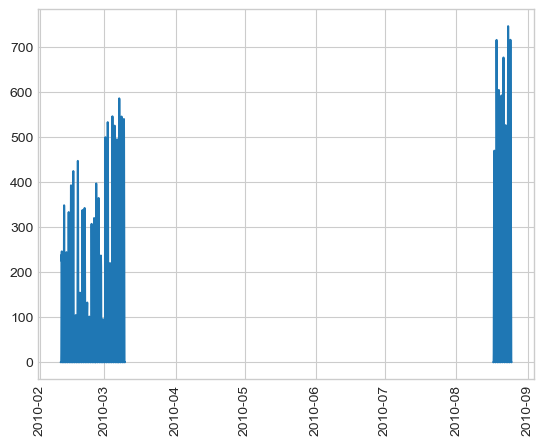

In [48]:
plt.plot(df_chunk.index,df_chunk["solarradiation"])
plt.xticks(rotation=90)
plt.show()

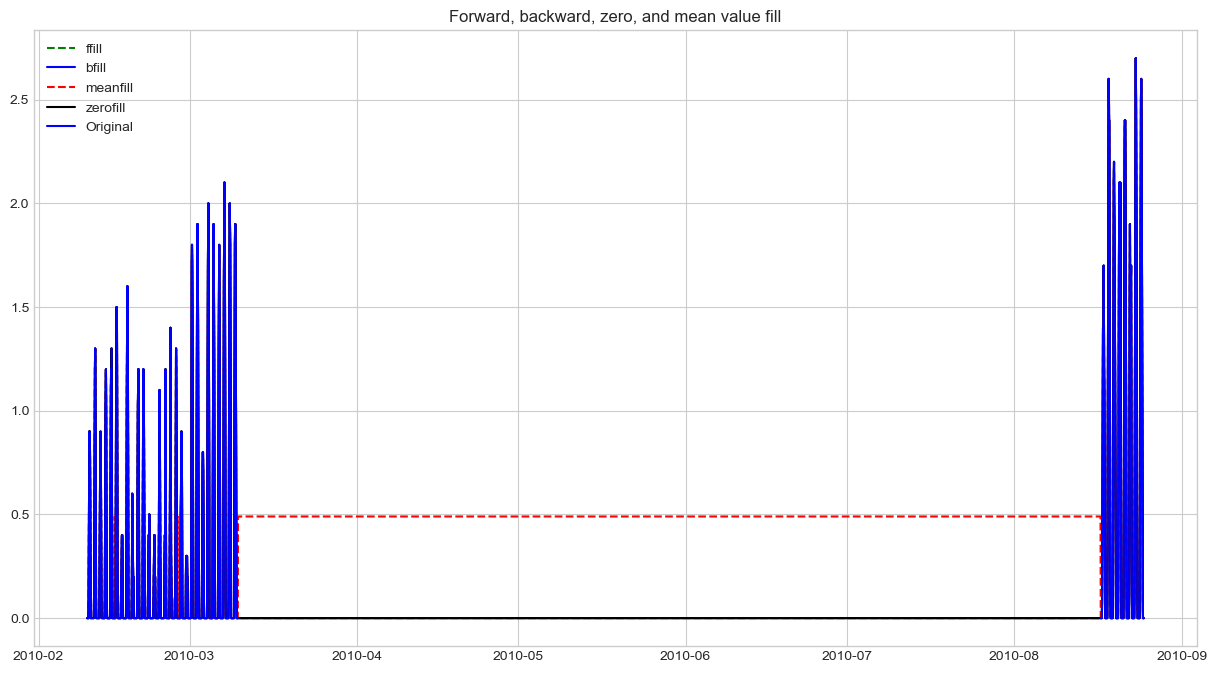

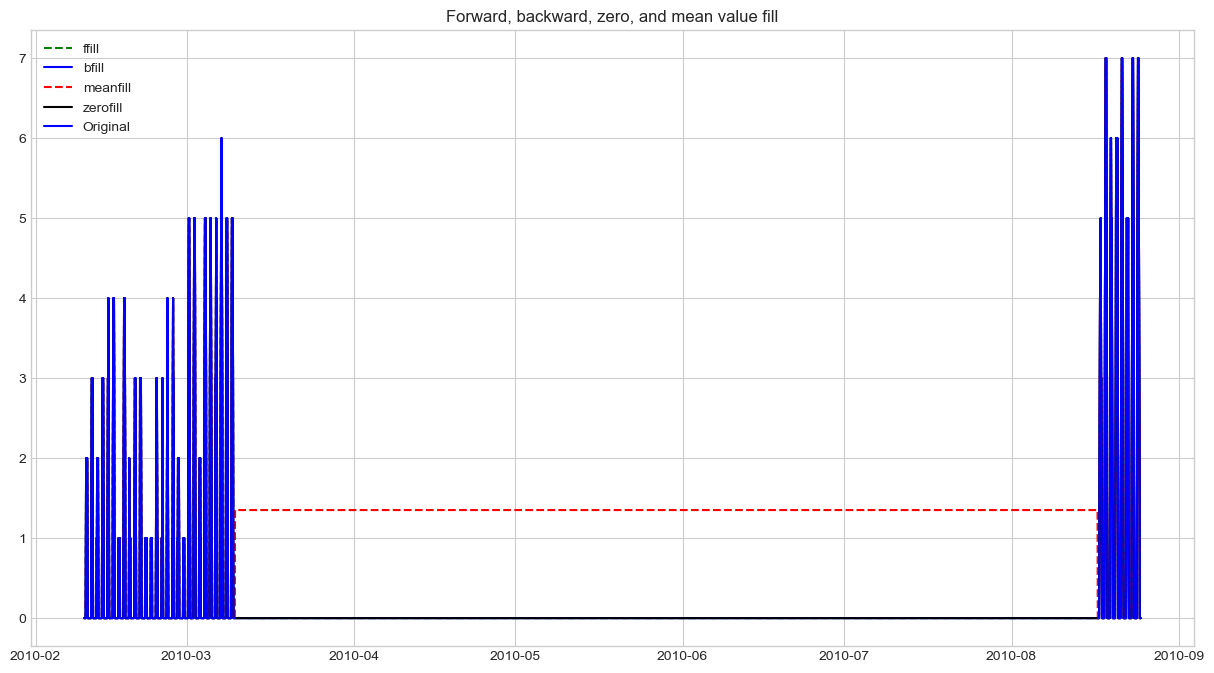

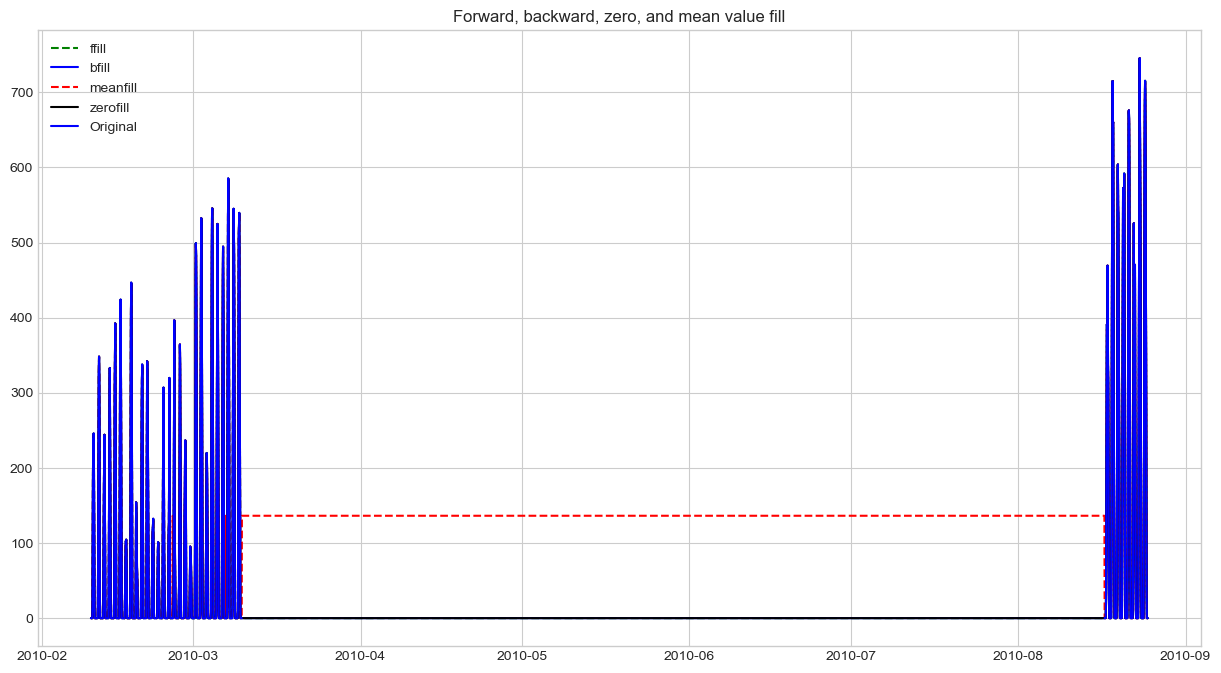

In [49]:
def plot_basic_fill_na(feature):
    df_chunk1 = df_chunk.copy()
    df_chunk1 = df_chunk1.loc[:, feature].to_frame()
    df_chunk1["ffill"] = df_chunk1[feature].ffill()
    df_chunk1["bfill"] = df_chunk1[feature].bfill()
    df_chunk1["meanfill"] = df_chunk1[feature].fillna(df[feature].mean())
    df_chunk1["zerofill"] = df_chunk1[feature].fillna(0)

    plt.figure(figsize=(15,8))
    plt.plot(df_chunk1.index,df_chunk1["ffill"],label="ffill", linestyle="--",color="green")
    plt.plot(df_chunk1.index,df_chunk1["bfill"],label="bfill", linestyle="-",color="blue")
    plt.plot(df_chunk1.index,df_chunk1["meanfill"],label="meanfill", linestyle="--",color="red")
    plt.plot(df_chunk1.index,df_chunk1["zerofill"],label="zerofill", linestyle="-",color="black")
    plt.plot(df_chunk1.index,df_chunk1[feature],label="Original",color="blue")
    plt.legend()
    plt.title('Forward, backward, zero, and mean value fill')
    plt.show()
plot_basic_fill_na("solarenergy")
plot_basic_fill_na("uvindex")
plot_basic_fill_na("solarradiation")

It is evident from the figure above that none of the imputations make sense. Since March to at least August is considered the summer, and during this period earth will receive more sunshine during this time. During those periods, solar radiation,energy and uvindex must be high.

Here we can see all of these feature has similar distribution. So going ahead we will use solarradiation to do our experiments and will use the same method which performs better for solarradiation.

In [50]:
df_chunk1 = df_chunk.copy()
df_chunk1= df_chunk1.set_index(df_chunk["datetime"])
df_chunk1 = df_chunk1.loc[:, "solarradiation"].to_frame()
df_chunk1.head()

solarradiation
datetime                           
2010-02-10 00:00:00             0.0
2010-02-10 01:00:00             0.0
2010-02-10 02:00:00             0.0
2010-02-10 03:00:00             0.0
2010-02-10 04:00:00             0.0

In [51]:
columns_to_interpolate = ['solarradiation', 'solarenergy', 'uvindex']
interpolation_methods_list = ['linear', 'quadratic', 'cubic', 'nearest', 'zero', 'slinear', 'barycentric', 'polynomial', 'krogh', 'piecewise_polynomial', 'pchip', 'akima', 'spline']

for methods in interpolation_methods_list:
    try:
        df_chunk1[methods] = df_chunk1["solarradiation"].interpolate(methods=methods)
    except Exception as e:
        df_chunk1[methods] = df_chunk1["solarradiation"].interpolate(methods=methods,order=2)
        print(f'{methods} : {e}')


In [52]:
df_chunk1.head()

solarradiation  linear  quadratic  cubic  nearest  zero  \
datetime                                                                       
2010-02-10 00:00:00             0.0     0.0        0.0    0.0      0.0   0.0   
2010-02-10 01:00:00             0.0     0.0        0.0    0.0      0.0   0.0   
2010-02-10 02:00:00             0.0     0.0        0.0    0.0      0.0   0.0   
2010-02-10 03:00:00             0.0     0.0        0.0    0.0      0.0   0.0   
2010-02-10 04:00:00             0.0     0.0        0.0    0.0      0.0   0.0   

                     slinear  barycentric  polynomial  krogh  \
datetime                                                       
2010-02-10 00:00:00      0.0          0.0         0.0    0.0   
2010-02-10 01:00:00      0.0          0.0         0.0    0.0   
2010-02-10 02:00:00      0.0          0.0         0.0    0.0   
2010-02-10 03:00:00      0.0          0.0         0.0    0.0   
2010-02-10 04:00:00      0.0          0.0         0.0    0.0   

                     piecewise_polynomial  pchip  akima  spline  
datetime                                                         
2010-02-10 00:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 01:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 02:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 03:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 04:00:00                   0.0    0.0    0.0     0.0

In [53]:
# interpolate methods are from 6th columns. so we will only plot those
df_chunk1.iloc[:,6:].head()

slinear  barycentric  polynomial  krogh  \
datetime                                                       
2010-02-10 00:00:00      0.0          0.0         0.0    0.0   
2010-02-10 01:00:00      0.0          0.0         0.0    0.0   
2010-02-10 02:00:00      0.0          0.0         0.0    0.0   
2010-02-10 03:00:00      0.0          0.0         0.0    0.0   
2010-02-10 04:00:00      0.0          0.0         0.0    0.0   

                     piecewise_polynomial  pchip  akima  spline  
datetime                                                         
2010-02-10 00:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 01:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 02:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 03:00:00                   0.0    0.0    0.0     0.0  
2010-02-10 04:00:00                   0.0    0.0    0.0     0.0

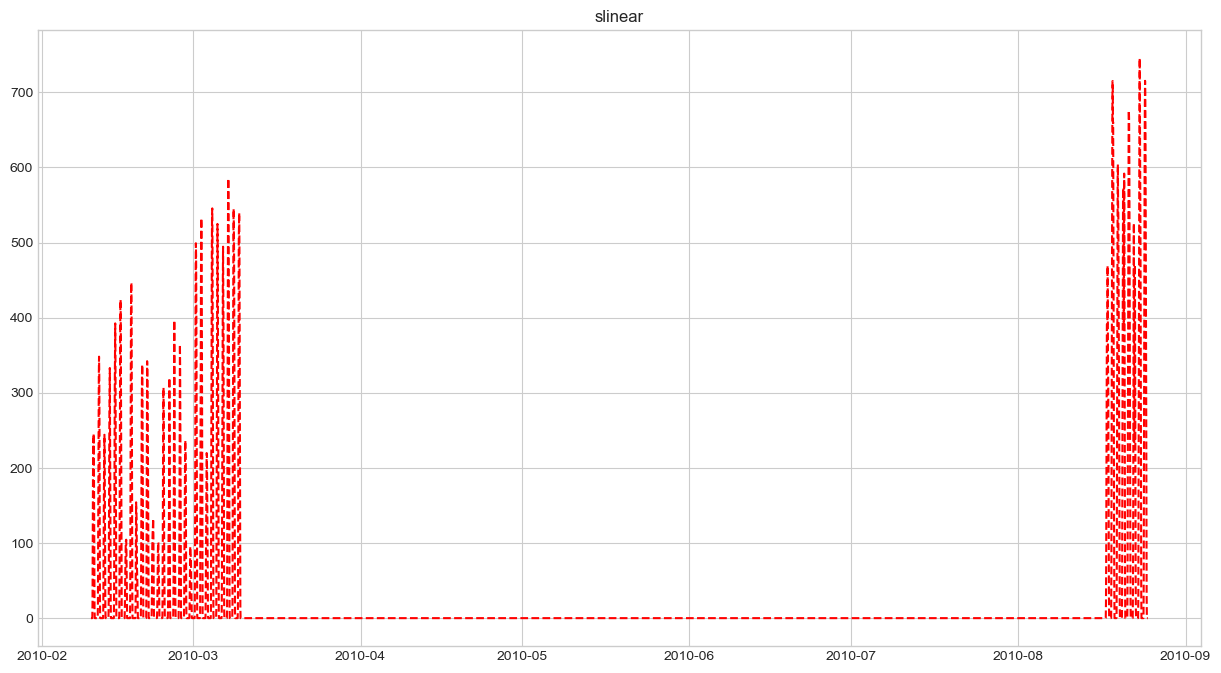

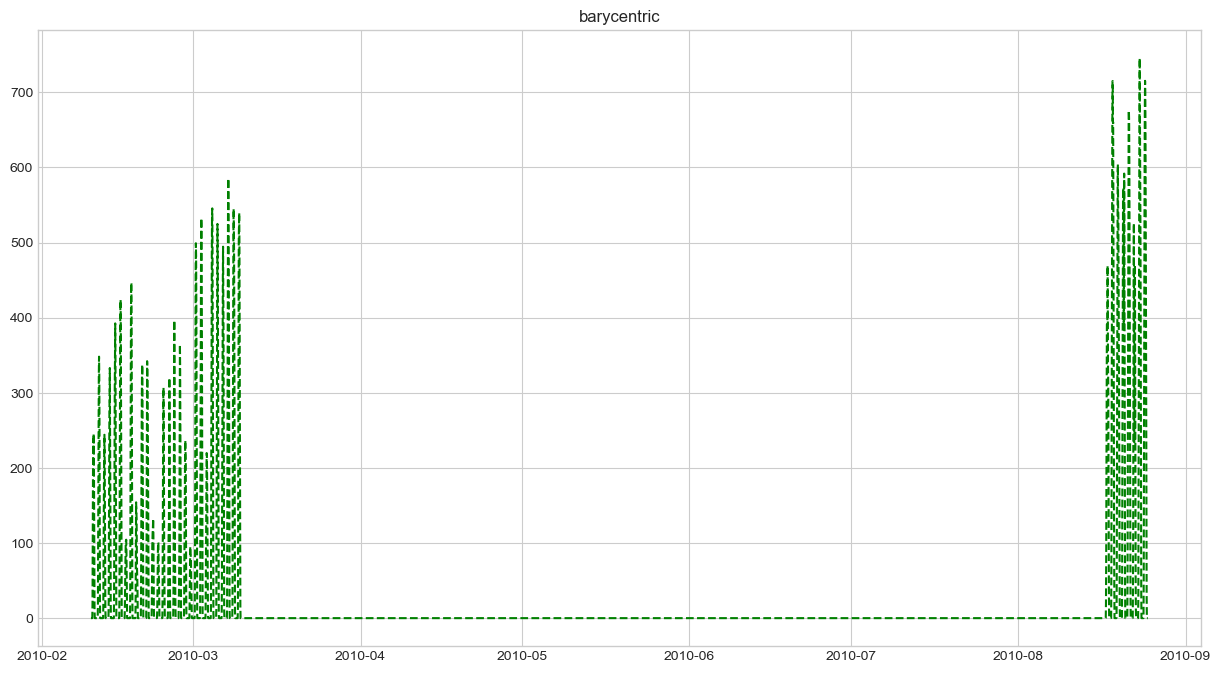

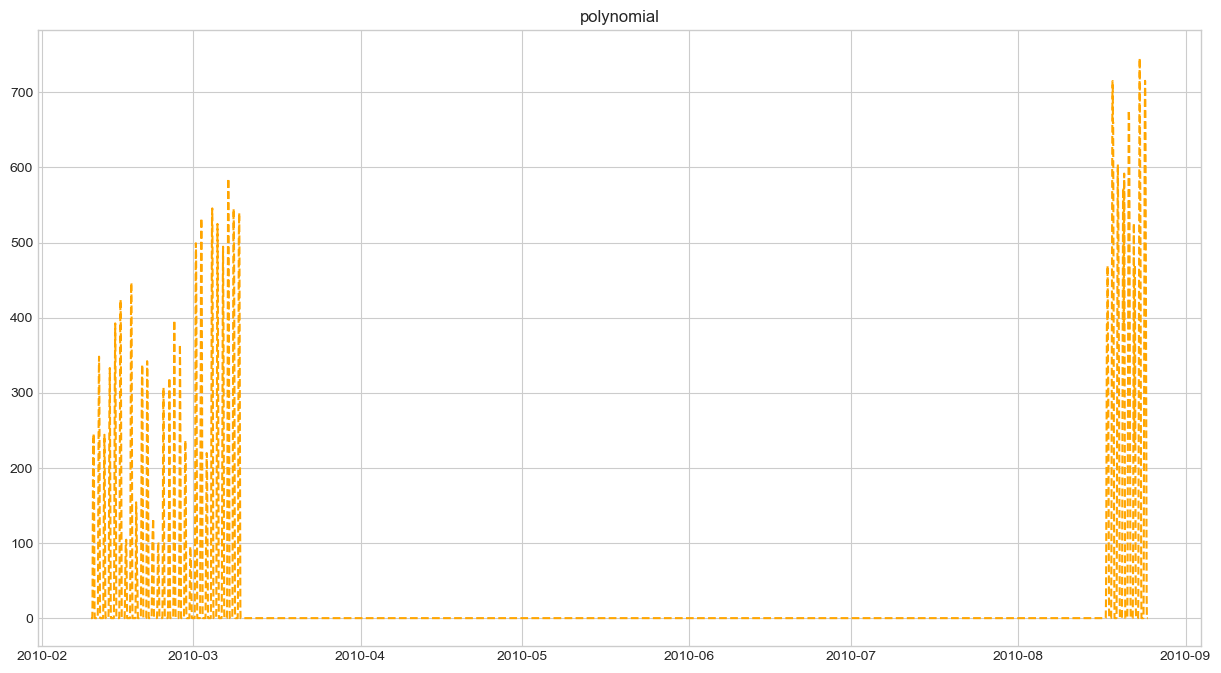

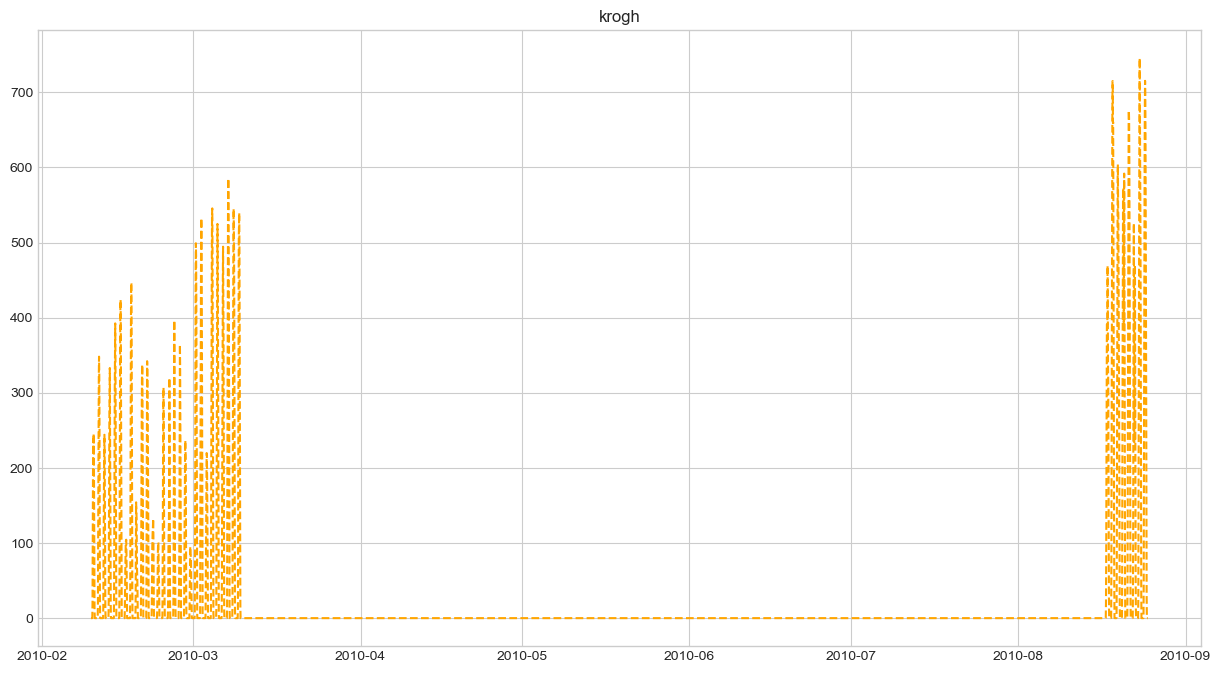

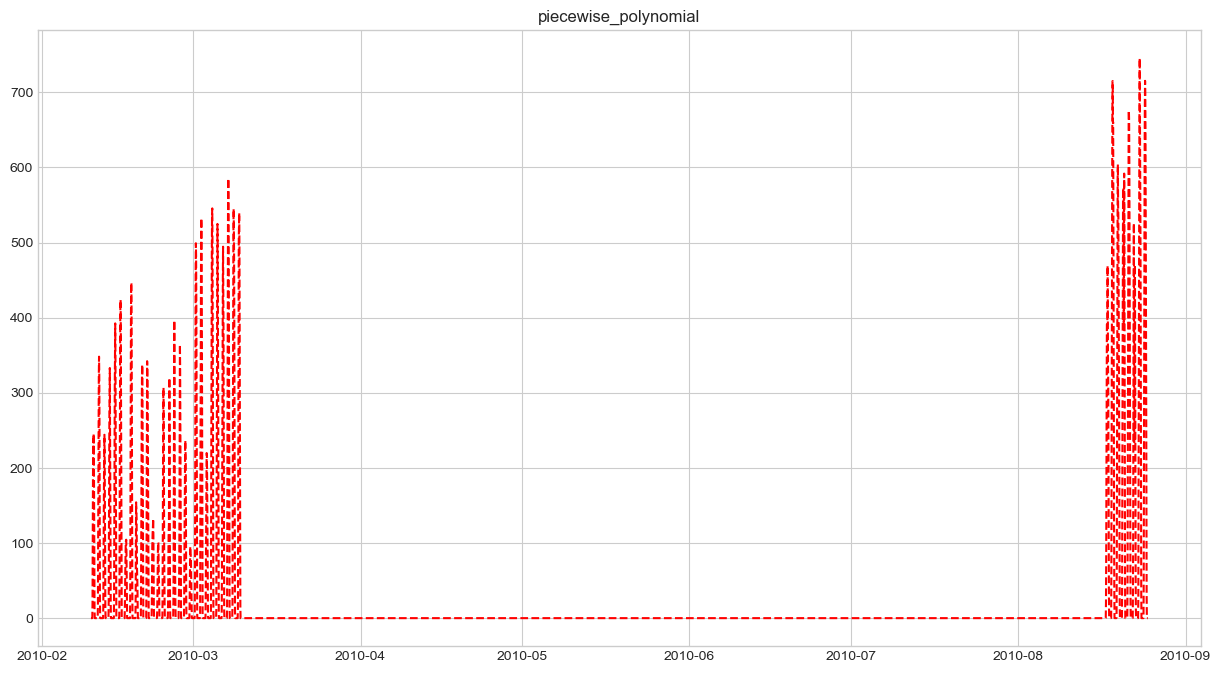

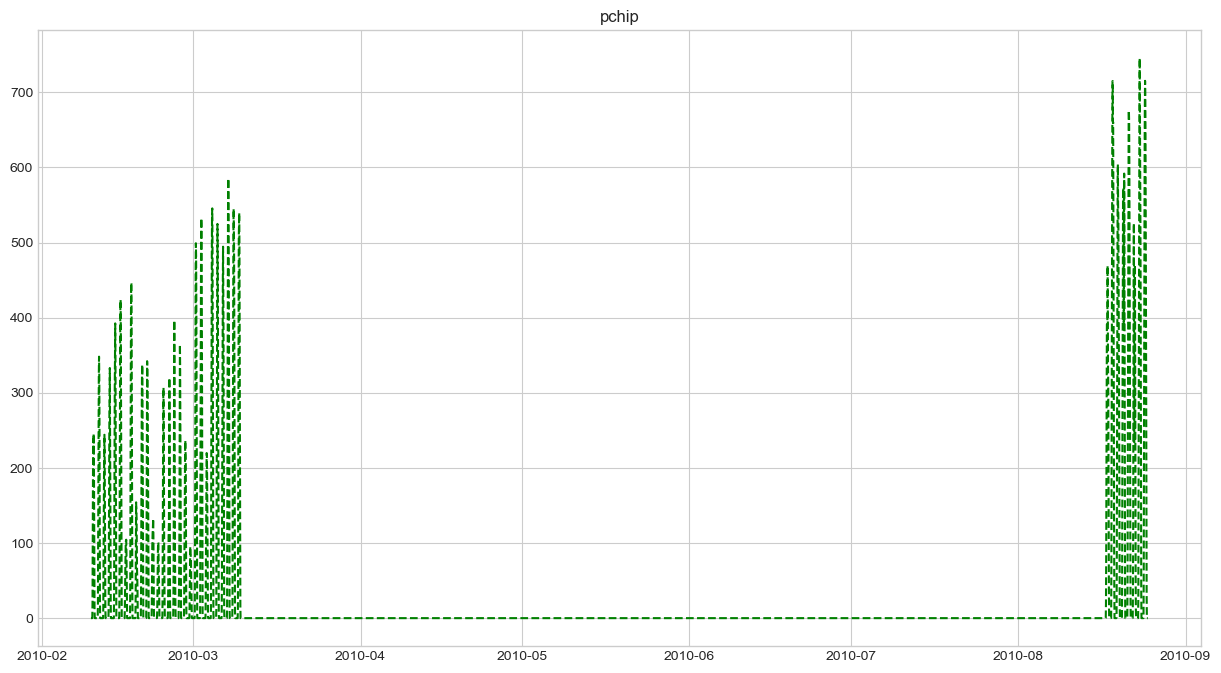

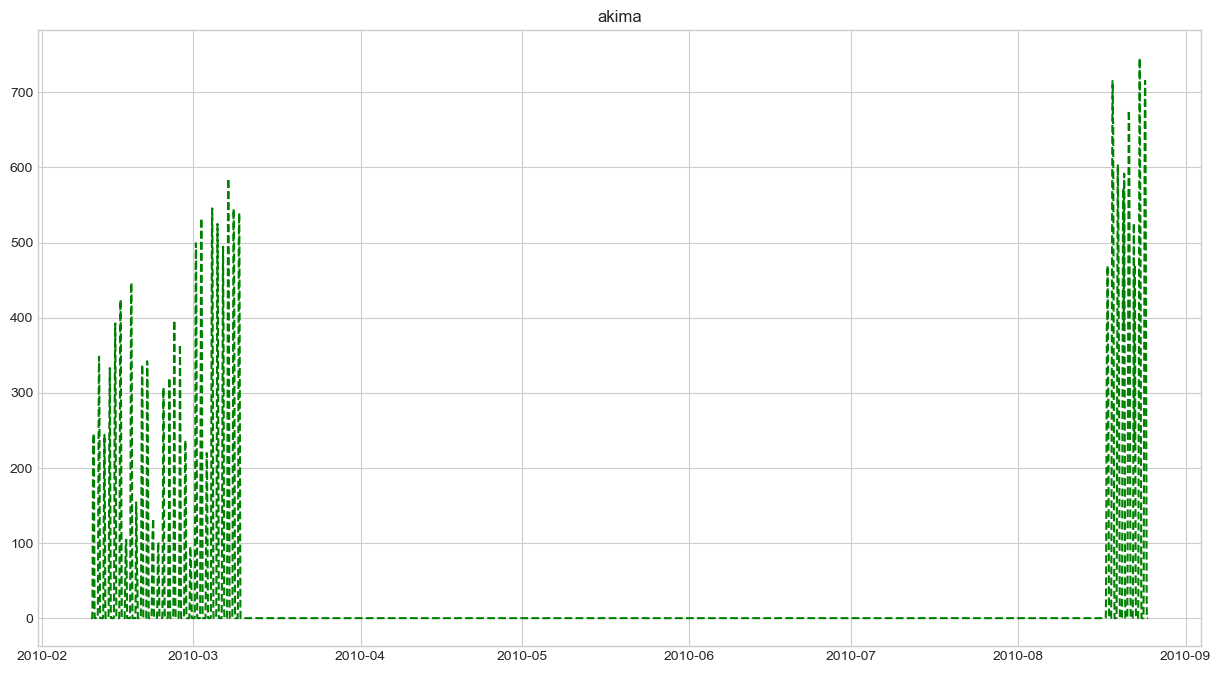

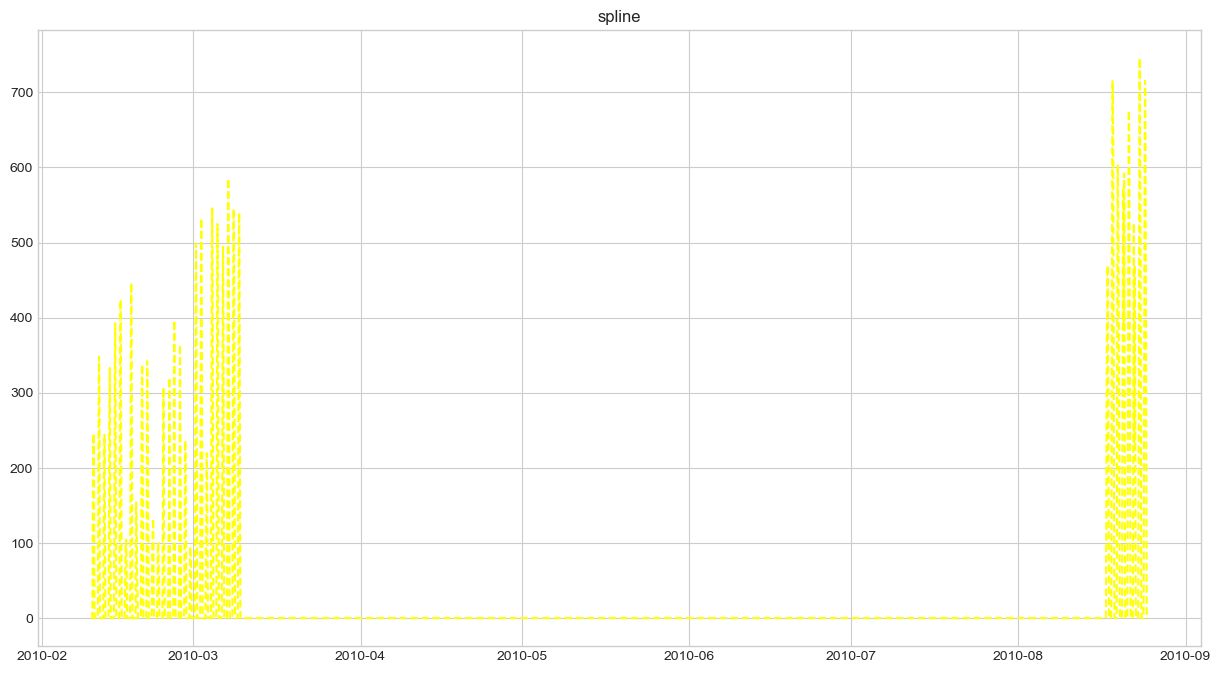

In [54]:
cols_to_plot = df_chunk1.iloc[:,6:]
color = ["r","b","g","purple","orange","yellow","black"]
for idx,i in enumerate(cols_to_plot):
    plt.figure(figsize=(15,8))
    plt.plot(df_chunk1.index,df_chunk1[i],label=i, linestyle="--",color=color[np.random.randint(0,7)])
    plt.title(i)

From the above plots we can see that every method is interpolating with the value of 0. While spline is performing a bit better with order 2.

Now the other method is predicting the NaN values of solarradiation, solarenergy and uvindex using a regressor model. Now it's all experiments. Even when we predict the values of these features values we will have to epxeriment if using interpolate works better or using a regression model perform better.

### Feature Selection

For feature selection the refernces that were taken are:

1. [Link 1](https://formesolar.com/how-wind-affects-solar-panels/)

2. [Link 2](https://www.solar.com/learn/how-do-wind-and-humidity-affect-solar-panel-efficiency/)

3. [Link 3](https://ae-solar.com/wind-effect-on-solar-panels/#:~:text=Wind%20speed%20has%20little%20influence,can%20increase%20just%20PV%20efficiency.)

Before predicting our values, let's decide which features to use for our model. Since we are forcasting solarenergy the important feature will be:

1. Temperature - If temperature is high means we are getting sunlight so we get high solar power.

2. Humidity - Like sweat beads, water vapor, or microscopic droplets of water, can collect on solar panels and reflect or refract sunlight away from solar cells. Because of this, they receive less sunlight, which produces less power. So this might provide our model some insight. [Link](https://www.solar.com/learn/how-do-wind-and-humidity-affect-solar-panel-efficiency/)

3. CloudCover - Cloudcover can imapct highly on solar power generation. If the cloud is covered it won't help panels to generate energy.

4. Solarradiation - If the solarradiation is low then energy is less generated and if the radiation is high then the energy generated is high as well.

5. UVIndex - uv rays also affect the generation of solarenergy. More the uv index higher the generation of the solar power.

6. Windspeed - windspeed helps solarpanel to remain cool and when panels are cooler they are efficient. Reference - [Link](https://ae-solar.com/wind-effect-on-solar-panels/)

7. Dew - The dew present on the solar panels can also negatively affect the production of solar energy. **Reference Research Paper** - [Link](https://www.seas.ucla.edu/~pilon/Publications/SOLMAT2021-effect%20of%20droplets%20on%20solar%20cells.pdf)



**Note - This is not the final feature selection. This project is extensively experimental. When building a model we will have to try adding and removing features form the final data which we will perform while building the model and choose the list of features which performs best.**

In [55]:
df_final = df[['temp', 'humidity', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex',"windspeed","dew"]]
df_final = df_final.set_index(pd.to_datetime(df["datetime"]).dt.date)
df_final.head()

temp  humidity  cloudcover  solarradiation  solarenergy  uvindex  \
datetime                                                                       
2010-01-01   0.5     95.56        28.9             NaN          NaN      NaN   
2010-01-01   0.3     93.41        33.8             NaN          NaN      NaN   
2010-01-01   0.2     92.79        42.1             NaN          NaN      NaN   
2010-01-01  -0.1     95.73        68.5             NaN          NaN      NaN   
2010-01-01  -1.2     95.70        19.2             NaN          NaN      NaN   

            windspeed  dew  
datetime                    
2010-01-01       19.0 -0.2  
2010-01-01       13.5 -0.6  
2010-01-01       14.3 -0.8  
2010-01-01       11.4 -0.7  
2010-01-01       13.6 -1.8

In [56]:
# just making copy of dataframes for future use
df_copy = df_final.copy()
df_interpolate = df_final.copy()

In [57]:
# since temp humidity and cloudcover has little amount of null data,
#  we can fill them using ffill

df_final["temp"] = df_final["temp"].ffill()
df_final["humidity"] = df_final["humidity"].ffill()
df_final["cloudcover"] = df_final["cloudcover"].ffill()

# using bfill for these two features increases our r2 score for predicting solarenergy,solarradiation and uvindex.
df_final["windspeed"] = df_final["windspeed"].bfill()
df_final["dew"] = df_final["dew"].bfill()

### Predicting Values using Regression models

<Axes: ylabel='datetime'>

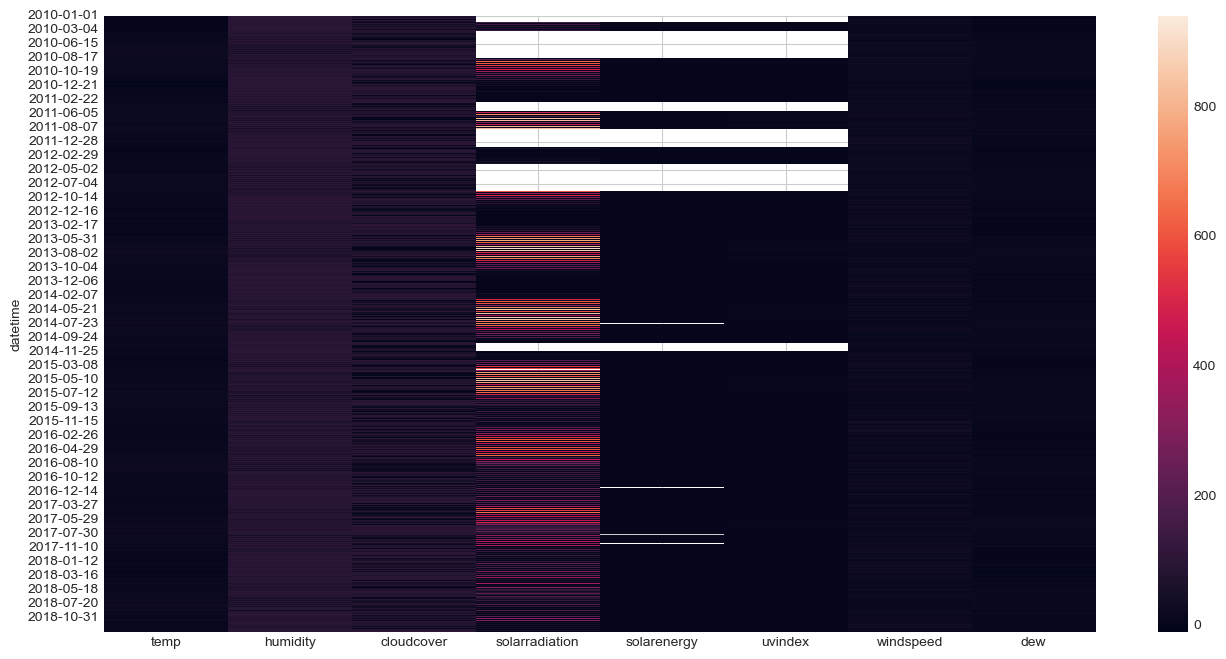

In [58]:
plt.figure(figsize=(16,8))
sns.heatmap(df_final)

Here in the heatmap we can see that solarradiation, solarenergy and uvindex has nulls in the similar time frames.

In [59]:
# checking the number of nulls in our final data.
df_final.isnull().sum()

temp                  0
humidity              0
cloudcover            0
solarradiation    10412
solarenergy       10397
uvindex           10396
windspeed             0
dew                   0
dtype: int64

In [60]:
df_final = df_final.set_index(pd.to_datetime(df["datetime"]))
df_final.head()

temp  humidity  cloudcover  solarradiation  solarenergy  \
datetime                                                                       
2010-01-01 00:00:00   0.5     95.56        28.9             NaN          NaN   
2010-01-01 01:00:00   0.3     93.41        33.8             NaN          NaN   
2010-01-01 02:00:00   0.2     92.79        42.1             NaN          NaN   
2010-01-01 03:00:00  -0.1     95.73        68.5             NaN          NaN   
2010-01-01 04:00:00  -1.2     95.70        19.2             NaN          NaN   

                     uvindex  windspeed  dew  
datetime                                      
2010-01-01 00:00:00      NaN       19.0 -0.2  
2010-01-01 01:00:00      NaN       13.5 -0.6  
2010-01-01 02:00:00      NaN       14.3 -0.8  
2010-01-01 03:00:00      NaN       11.4 -0.7  
2010-01-01 04:00:00      NaN       13.6 -1.8

In [61]:
df_final1 = df_final.copy()

In [62]:
df_final1.isnull().sum()

temp                  0
humidity              0
cloudcover            0
solarradiation    10412
solarenergy       10397
uvindex           10396
windspeed             0
dew                   0
dtype: int64

In [63]:
""" 
making a copy of df_final so that we will use it for filling null values for modelling.
since filling null values is very important before modelling.

To fill the NaN values other method was also tried but the mean performed better in this case.

"""
df_final2 = df_final.copy()

df_final2["solarradiation"] = df_final2["solarradiation"].fillna(df_final2["solarradiation"].mean())
df_final2["solarenergy"] = df_final2["solarenergy"].fillna(df_final2["solarenergy"].mean())
df_final2["uvindex"] = df_final2["uvindex"].fillna(df_final2["uvindex"].mean())

In [64]:
# splitting data into x and y train.

X_train = df_final2.drop(["solarradiation","solarenergy","uvindex"],axis=1)
y_train = df_final2[["solarradiation","solarenergy","uvindex"]]

In [65]:
X_train.head()

temp  humidity  cloudcover  windspeed  dew
datetime                                                       
2010-01-01 00:00:00   0.5     95.56        28.9       19.0 -0.2
2010-01-01 01:00:00   0.3     93.41        33.8       13.5 -0.6
2010-01-01 02:00:00   0.2     92.79        42.1       14.3 -0.8
2010-01-01 03:00:00  -0.1     95.73        68.5       11.4 -0.7
2010-01-01 04:00:00  -1.2     95.70        19.2       13.6 -1.8

In [66]:
# here we have used xgbregressor as our estimator because it was performing better than other models.

reg = MultiOutputRegressor(estimator = XGBRegressor())
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

In [67]:
# predicting our whole dataset. Even though we have data leakage here we will experiment and try out.

reg_pred = reg.predict(df_final.drop(["solarradiation","solarenergy","uvindex"],axis=1))
ops = pd.DataFrame(reg_pred, columns=["solarradiation_pred","solarenergy_pred","uvindex_pred"])
ops.head()

solarradiation_pred  solarenergy_pred  uvindex_pred
0            26.790672          0.155081      0.338034
1            44.757755          0.118896      0.408701
2            37.712322          0.144601      0.334722
3            43.019161          0.184870      0.468685
4            45.063091          0.183713      0.545867

In [68]:
# just making a list of column names and saving it for future use.

feat_ip = ["solarradiation","solarenergy","uvindex"]
feat_op = ["solarradiation_pred","solarenergy_pred","uvindex_pred"]

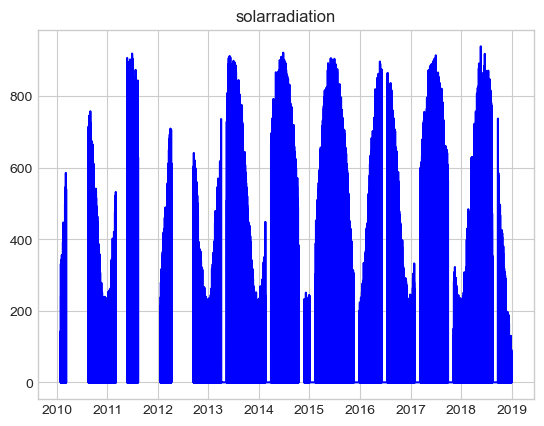

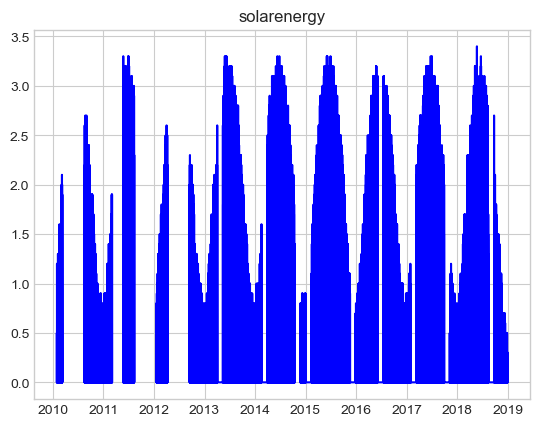

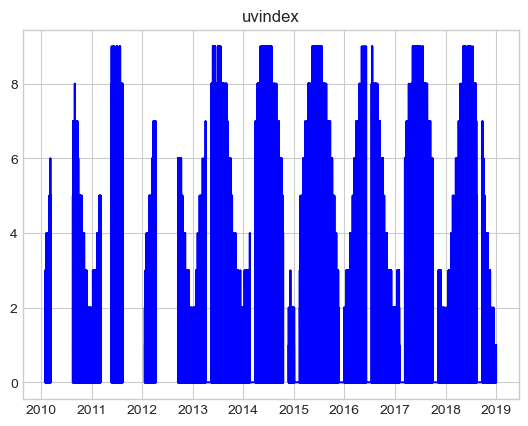

In [69]:
for i in feat_ip:
    plt.plot(df_final1.index,df_final1[i],color="blue")
    plt.title(i)
    plt.show()

In [70]:
from sklearn.metrics import r2_score

print(f"R2 Score of SolarEnergy",r2_score(df_final["solarenergy"].fillna(df_final["solarenergy"].mean()),ops["solarenergy_pred"]))
print(f"R2 Score of SolarRadiation",r2_score(df_final["solarradiation"].fillna(df_final["solarenergy"].mean()),ops["solarradiation_pred"]))
print(f"R2 Score of UVIndex",r2_score(df_final["uvindex"].fillna(df_final["solarenergy"].mean()),ops["uvindex_pred"]))

R2 Score of SolarEnergy 0.4953324588216085
R2 Score of SolarRadiation 0.4522642001032172
R2 Score of UVIndex 0.47058600472894885


In [71]:
df_final.isnull().sum()

temp                  0
humidity              0
cloudcover            0
solarradiation    10412
solarenergy       10397
uvindex           10396
windspeed             0
dew                   0
dtype: int64

In [72]:
ops = ops.set_index(df_final.index)
ops.head()

solarradiation_pred  solarenergy_pred  uvindex_pred
datetime                                                                
2010-01-01 00:00:00            26.790672          0.155081      0.338034
2010-01-01 01:00:00            44.757755          0.118896      0.408701
2010-01-01 02:00:00            37.712322          0.144601      0.334722
2010-01-01 03:00:00            43.019161          0.184870      0.468685
2010-01-01 04:00:00            45.063091          0.183713      0.545867

In [73]:

# Here we are filling the NaN values only with the corresponding predicted values
#  in the same time frame


df_final["solarenergy"] = df_final["solarenergy"].fillna(ops["solarenergy_pred"])
df_final["solarradiation"] = df_final["solarradiation"].fillna(ops["solarradiation_pred"])
df_final["uvindex"] = df_final["uvindex"].fillna(ops["uvindex_pred"])

In [74]:
df_final.isnull().sum()

temp              0
humidity          0
cloudcover        0
solarradiation    0
solarenergy       0
uvindex           0
windspeed         0
dew               0
dtype: int64

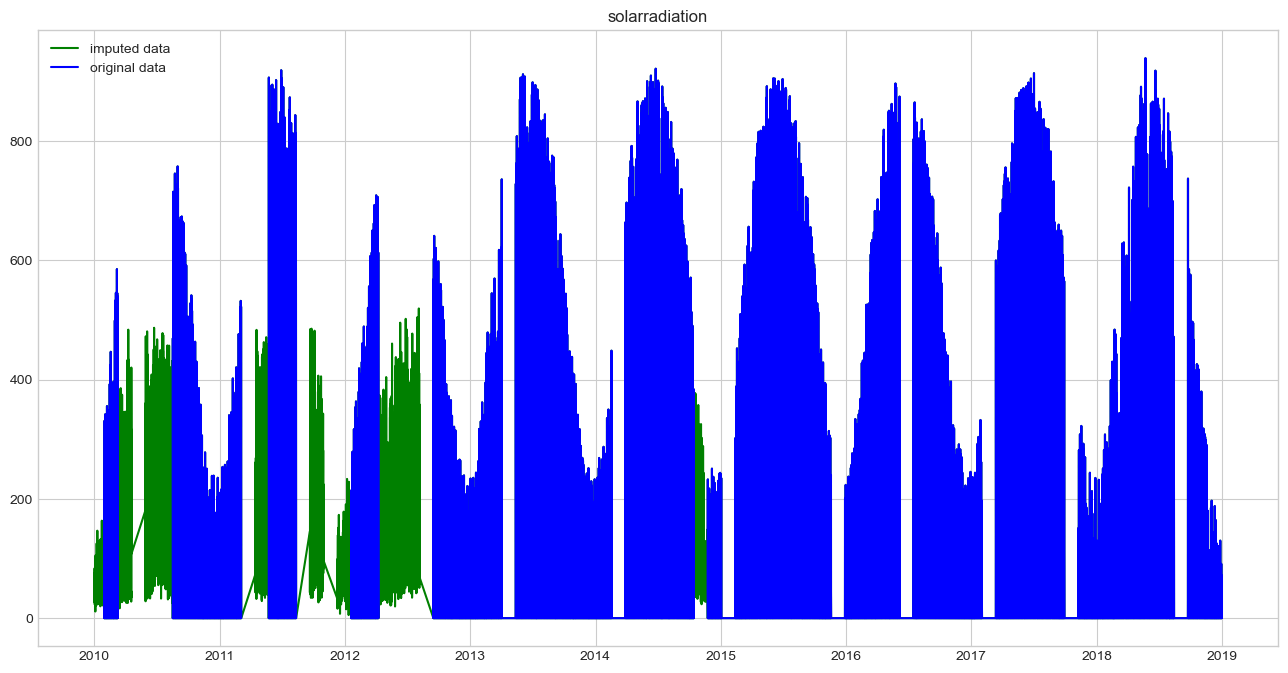

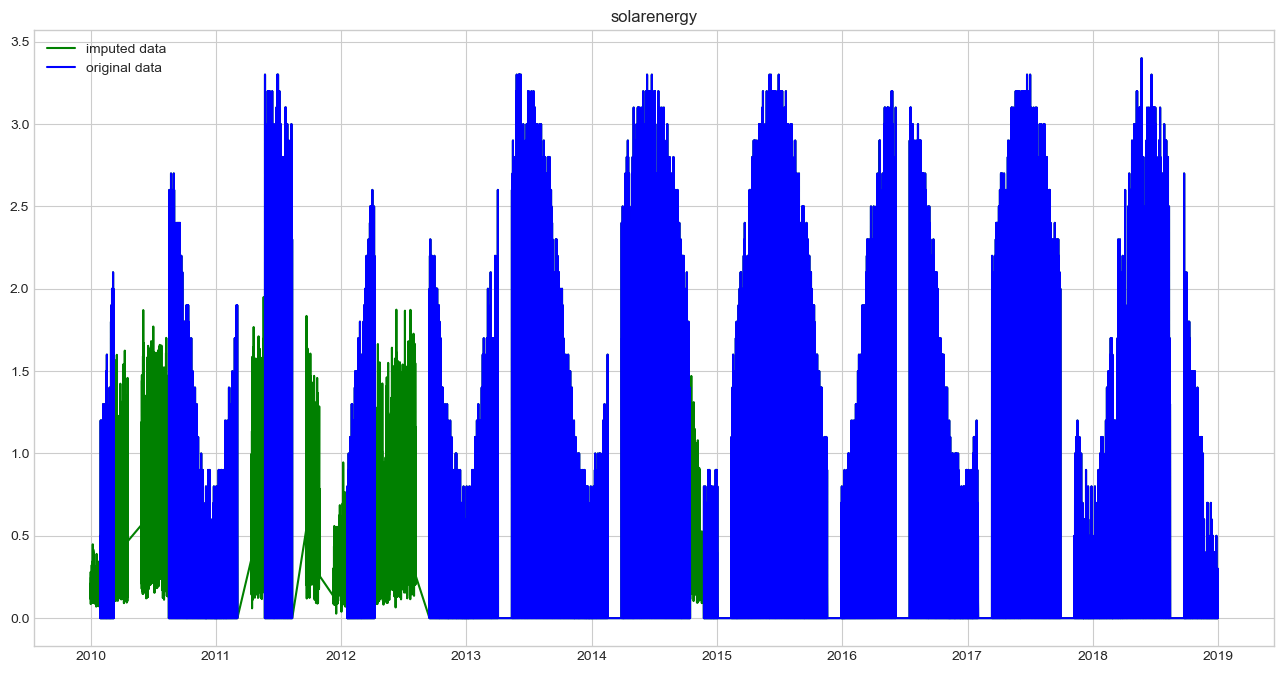

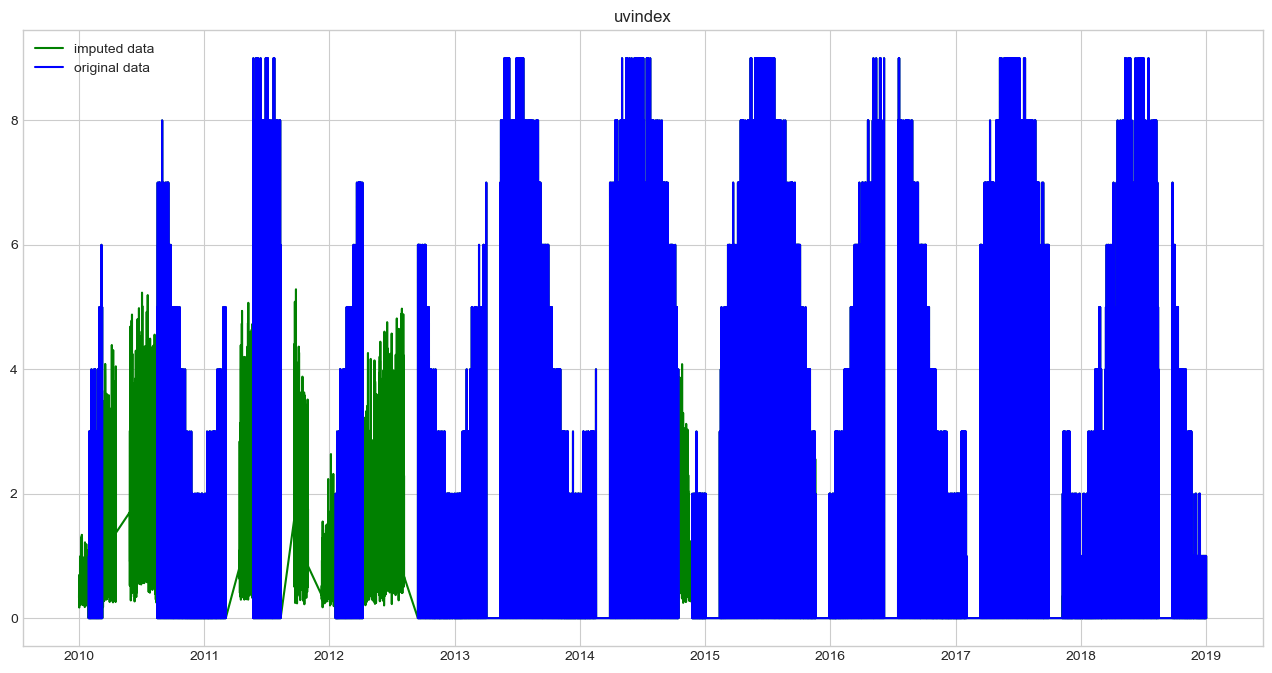

In [75]:
for i in range(3):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(df_final.index, df_final[feat_ip[i]], color="green", label="imputed data")
    ax.plot(df_final.index, df_final1[feat_ip[i]], color="blue", label="original data")
    ax.set_title(feat_ip[i])
    ax.legend()
    plt.show()

Here in the above plots we can see that the maximum of null values are kind of being imputed. Since this is extremely experimental, so we will have to try out different imputation methods on our model. we will check the performance and we will use the model as the final model whichever imputation performs better. So considering this as experimental we will work first on our predicted values data and then we will use interpolated data for modelling further.

Let's see now our imputed data plot

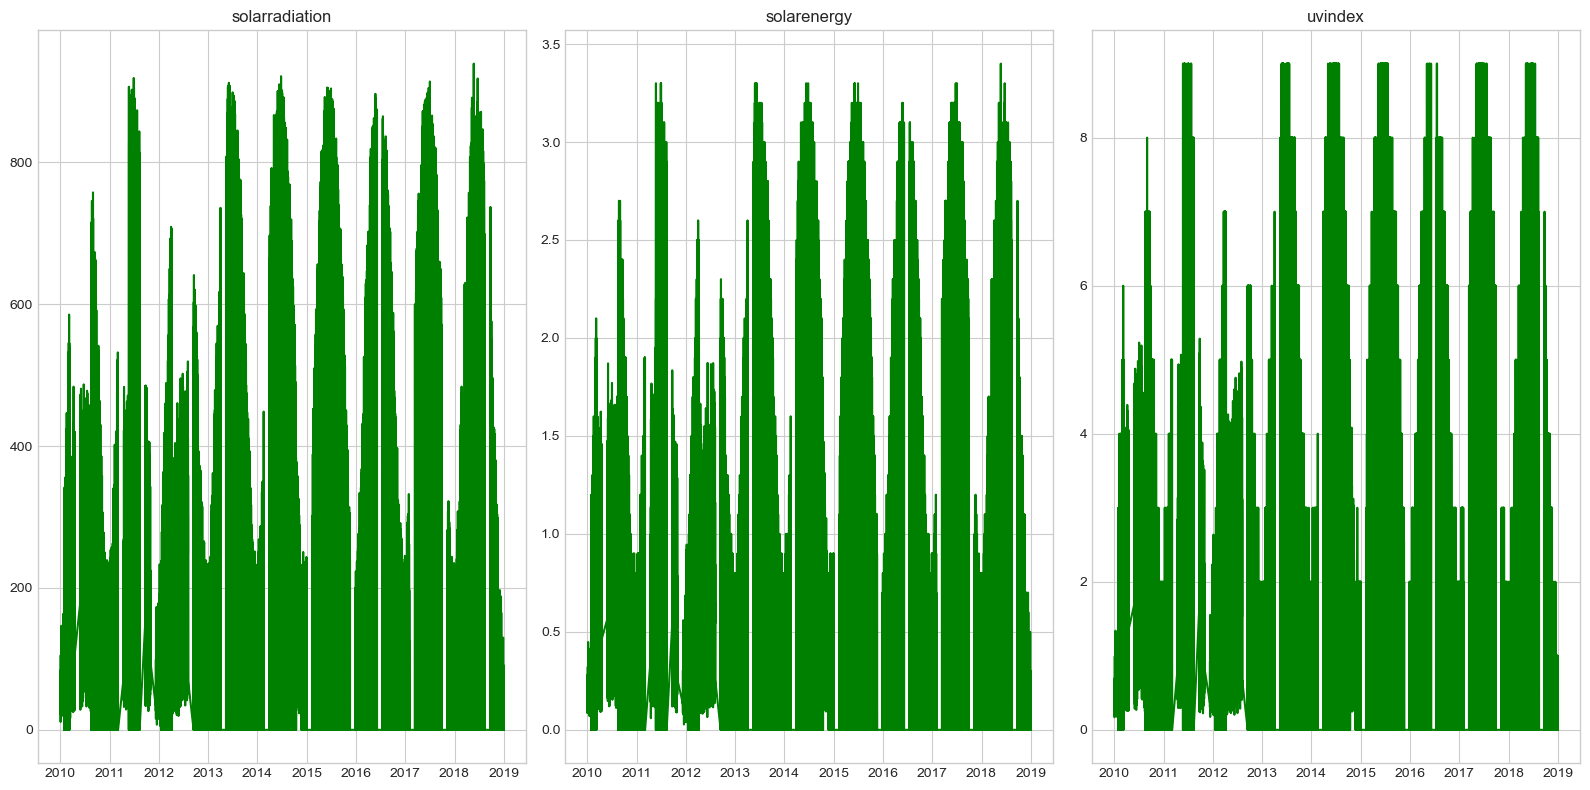

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

for i, ax in enumerate(ax):
    ax.plot(df_final.index, df_final[feat_ip[i]], color="green")
    ax.set_title(feat_ip[i])

plt.tight_layout()
plt.show()

Here we can see that our data has been imputed.

### Imputing Nulls using interpolation techniques

In [77]:
df_interpolate = df_interpolate.set_index(pd.to_datetime(df["datetime"]))
df_interpolate.head()

temp  humidity  cloudcover  solarradiation  solarenergy  \
datetime                                                                       
2010-01-01 00:00:00   0.5     95.56        28.9             NaN          NaN   
2010-01-01 01:00:00   0.3     93.41        33.8             NaN          NaN   
2010-01-01 02:00:00   0.2     92.79        42.1             NaN          NaN   
2010-01-01 03:00:00  -0.1     95.73        68.5             NaN          NaN   
2010-01-01 04:00:00  -1.2     95.70        19.2             NaN          NaN   

                     uvindex  windspeed  dew  
datetime                                      
2010-01-01 00:00:00      NaN       19.0 -0.2  
2010-01-01 01:00:00      NaN       13.5 -0.6  
2010-01-01 02:00:00      NaN       14.3 -0.8  
2010-01-01 03:00:00      NaN       11.4 -0.7  
2010-01-01 04:00:00      NaN       13.6 -1.8

In [78]:
# since temp humidity and cloudcover has little amount of null data,
#  we can fill them using ffill

df_interpolate["temp"] = df_interpolate["temp"].ffill()
df_interpolate["humidity"] = df_interpolate["humidity"].ffill()
df_interpolate["cloudcover"] = df_interpolate["cloudcover"].ffill()


# using bfill for these two features increases our r2 score for predicting solarenergy,solarradiation and uvindex.
df_interpolate["windspeed"] = df_interpolate["windspeed"].bfill()
df_interpolate["dew"] = df_interpolate["dew"].bfill()

For now we will use spline interpolate with order 1 since order 2 was going for negative solarradiation which is impossible. So we will use order 1

In [79]:
df_interpolate["solarradiation"] = df_interpolate["solarradiation"].interpolate(method="spline",order=1)
df_interpolate["solarenergy"] = df_interpolate["solarenergy"].interpolate(method="spline",order=1)
df_interpolate["uvindex"] = df_interpolate["uvindex"].interpolate(method="spline",order=1)

In [80]:
df_interpolate.isnull().sum()

temp                0
humidity            0
cloudcover          0
solarradiation    672
solarenergy       672
uvindex           672
windspeed           0
dew                 0
dtype: int64

In [81]:
# imputing remaining data using ffill.

df_interpolate["solarradiation"] = df_interpolate["solarradiation"].ffill()
df_interpolate["solarenergy"] = df_interpolate["solarenergy"].ffill()
df_interpolate["uvindex"] = df_interpolate["uvindex"].ffill()

In [82]:
df_interpolate.isnull().sum()

temp                0
humidity            0
cloudcover          0
solarradiation    672
solarenergy       672
uvindex           672
windspeed           0
dew                 0
dtype: int64

In [83]:
# Above we can see that tteh data are not imputed so now we will try with bfill.

df_interpolate["solarradiation"] = df_interpolate["solarradiation"].bfill()
df_interpolate["solarenergy"] = df_interpolate["solarenergy"].bfill()
df_interpolate["uvindex"] = df_interpolate["uvindex"].bfill()

In [84]:
df_interpolate.isnull().sum()

temp              0
humidity          0
cloudcover        0
solarradiation    0
solarenergy       0
uvindex           0
windspeed         0
dew               0
dtype: int64

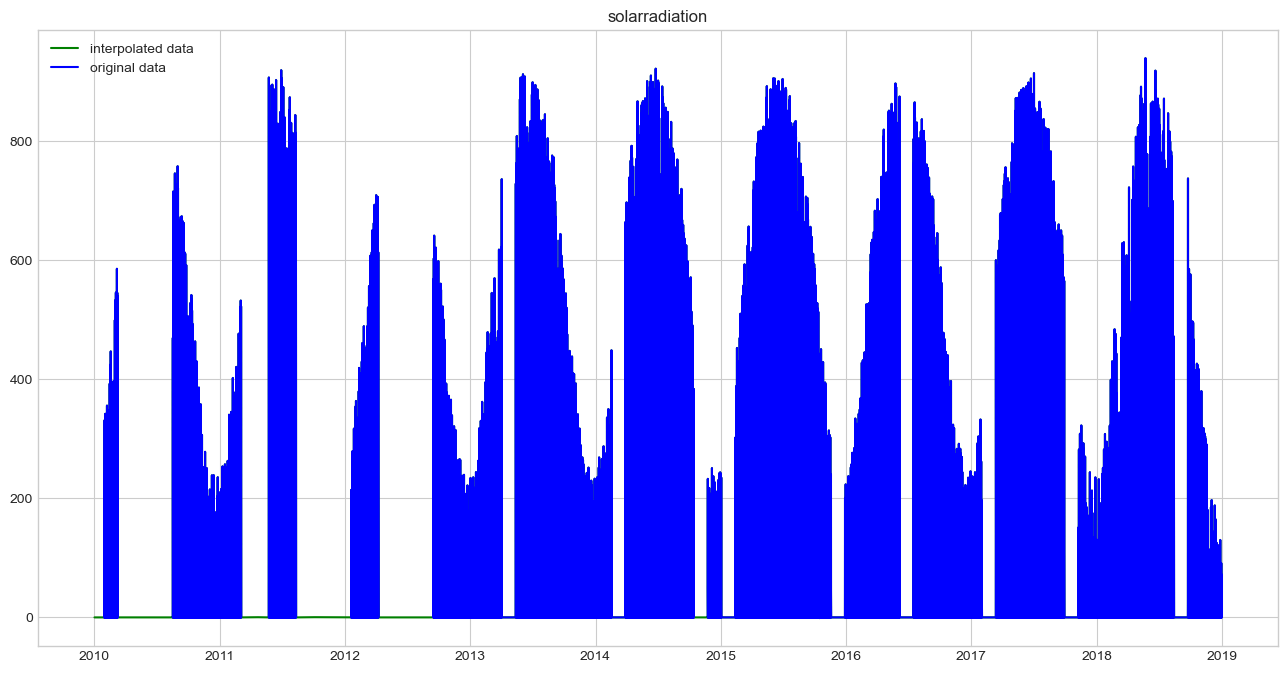

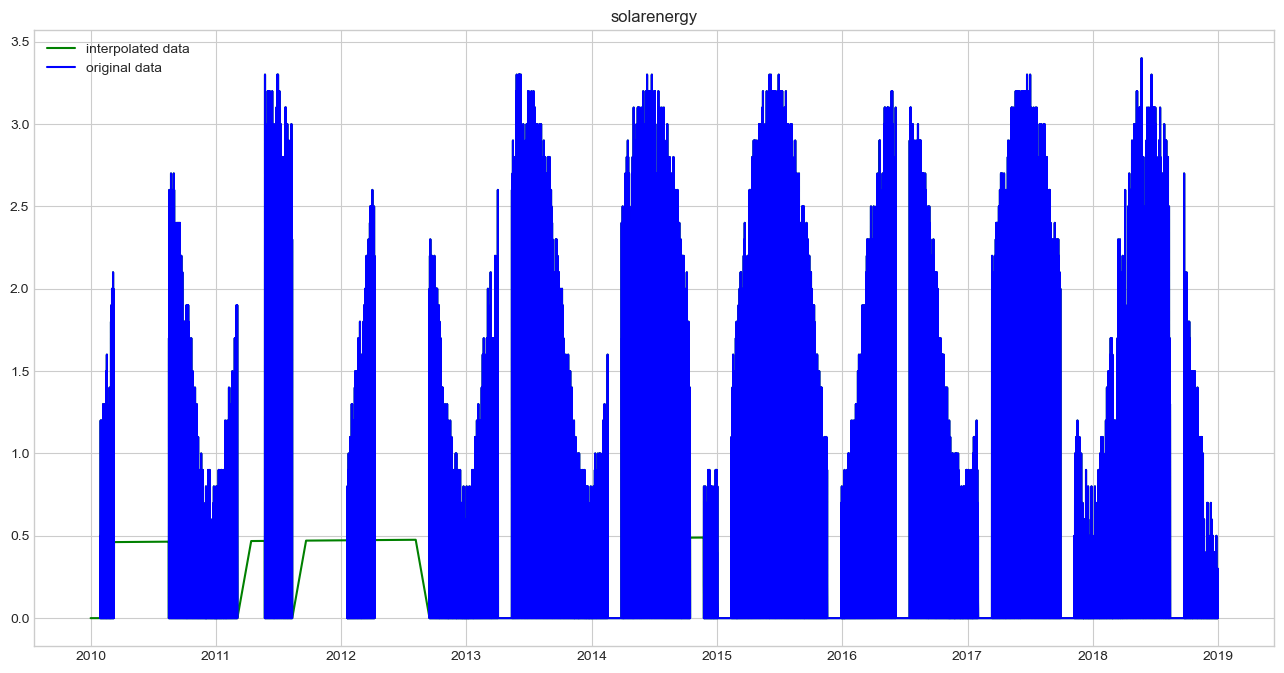

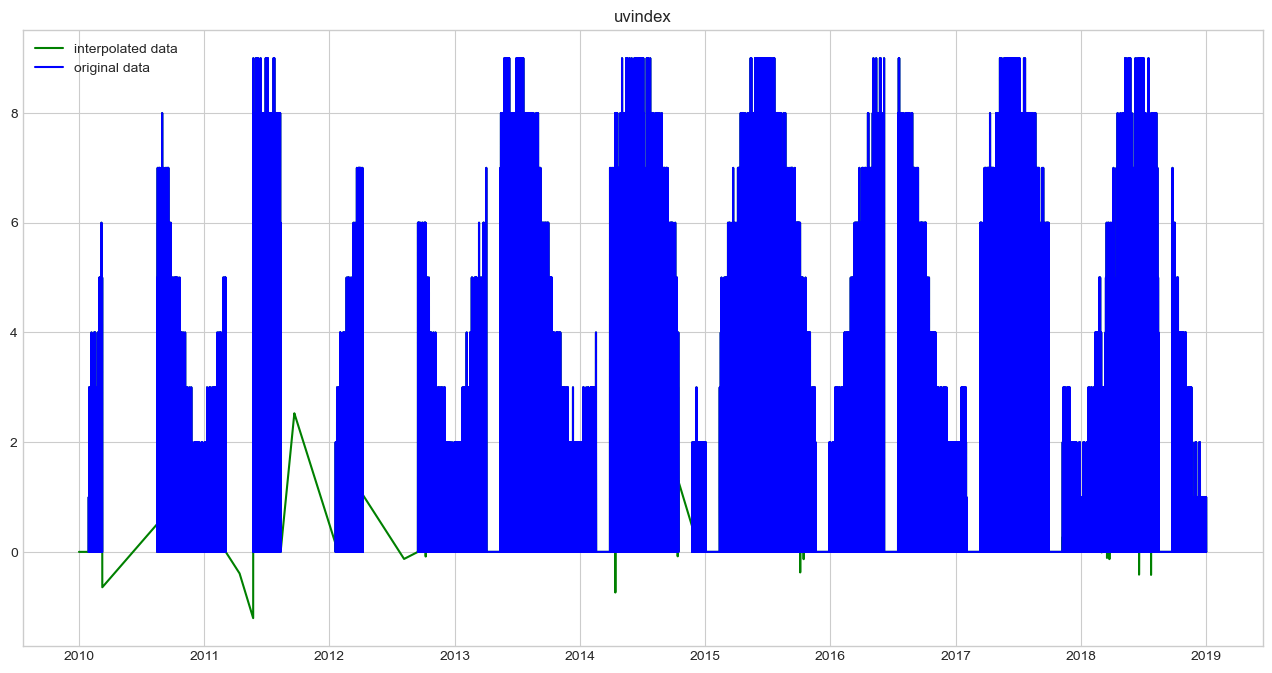

In [85]:
# plots the line plot of interpolated and original data

for i in range(3):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(df_final.index, df_interpolate[feat_ip[i]], color="green", label="interpolated data")
    ax.plot(df_final.index, df_copy[feat_ip[i]], color="blue", label="original data")
    ax.set_title(feat_ip[i])
    ax.legend()
    plt.show()

From the above plots it can be seen that interpolation is not working fine. But lets model it and lets see which of our two preprocessed data gets a good result.


Now we have two dataframes to work with. We will first work with df_final which is predicted data using XGBRegressor. First we will see performance on that imputed data on timeseries model then we will use the interpolated dataframe which is df_interpolate. During model training other new imputation techniques might be tried as well. 